<a href="https://colab.research.google.com/github/DanielRaiicHu/TelecomX/blob/main/TelecomX.ipynb?forceRefresh=true">
  <img src="https://drive.google.com/uc?export=view&id=191Woxwut0iaIL2hCcCIeXRSB6oba_88H" alt="Abrir en Colab" width="120"/>
</a>

# **Proyecto: Telecom X**

**Objetivo:**  
Investigar y detectar patrones asociados a la evasión de clientes (abandono del servicio) en Telecom X, utilizando técnicas de análisis exploratorio de datos  para entender el perfil, comportamiento y características que diferencian a los clientes que abandonan la empresa de aquellos que permanecen.

Este estudio se centra en:

>* Analizar variables demográficas y contractuales.
>* Explorar la relación entre los servicios contratados y la evasión.
>* Evaluar los métodos de pago y su impacto en la permanencia.
>* Visualizar comparativas relevantes entre segmentos de clientes.
>* Detectar oportunidades de mejora en la retención de clientes.

El análisis se apoya en visualizaciones estructuradas y comentarios detallados, lo cual permitirá obtener **hallazgos claros y accionables** que puedan apoyar a la toma de decisiones del área de retención de clientes.


## **Archivo del proyecto**

https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json

**Exploración básica**
```
df.shape           # Dimensiones del DataFrame
df.columns         # Lista de nombres de columnas
df.head()          # Primeras 5 filas
df.info()          # Resumen de tipos de datos y valores nulos
df.describe()      # Estadísticas numéricas (si hay números)
df.dtypes          # Tipo de dato por columna
df.isnull().sum()  # Conteo de valores nulos por columna
```



## **Extracción de datos**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import seaborn as sns
import numpy as np

### **Leyendo los datos**

In [2]:
url = 'https://raw.githubusercontent.com/alura-cursos/challenge2-data-science-LATAM/refs/heads/main/TelecomX_Data.json'

In [3]:
df = pd.read_json(url)

In [4]:
df.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


### **Normalizando el dataframe**

Debemos normalizar el dataframe ya que presenta información anidada.
Sobreescribiremos el dataframe.

In [5]:
# Normalizo cada una de las columnas que contienen diccionarios
df_customer = pd.json_normalize(df['customer'])
df_phone = pd.json_normalize(df['phone'])
df_internet = pd.json_normalize(df['internet'])
df_account = pd.json_normalize(df['account'])

# Concateno las columnas con las columnas normalizadas en el dataframe
df = pd.concat([df[['customerID', 'Churn']], df_customer, df_phone, df_internet, df_account], axis=1)
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


## **Análisis de los datos**

In [6]:
# Dimensiones del Datafrane
df.shape

(7267, 21)

In [7]:
# Las columnas que tenemos en el dataframe
df.columns

Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly',
       'Charges.Total'],
      dtype='object')

In [8]:
# Para ver la información relevante y tipos de datos de las columnas
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


In [9]:
# Revisión de datos únicos para cada columna
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(df[col].unique())
        print("—" * 40)

Valores únicos en 'customerID':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Churn':
['No' 'Yes' '']
————————————————————————————————————————
Valores únicos en 'gender':
['Female' 'Male']
————————————————————————————————————————
Valores únicos en 'Partner':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'Dependents':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'PhoneService':
['Yes' 'No']
————————————————————————————————————————
Valores únicos en 'MultipleLines':
['No' 'Yes' 'No phone service']
————————————————————————————————————————
Valores únicos en 'InternetService':
['DSL' 'Fiber optic' 'No']
————————————————————————————————————————
Valores únicos en 'OnlineSecurity':
['No' 'Yes' 'No internet service']
————————————————————————————————————————
Valores únicos en 'OnlineBackup':
['Yes' 'No' 'No internet service']
————————————————————

In [10]:
# Analizando datos
df['Charges.Total'][0]

'593.3'

In [11]:
# Tipos de datos
type(df['SeniorCitizen'][0])

numpy.int64

In [12]:
# Ver las filas con el campo en blanco en la columna Churn
df[df['Churn'] == '']

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
30,0047-ZHDTW,,Female,0,No,No,11,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),79.00,929.3
75,0120-YZLQA,,Male,0,No,No,71,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),19.90,1355.1
96,0154-QYHJU,,Male,0,No,No,29,Yes,No,DSL,...,Yes,No,Yes,No,No,One year,Yes,Electronic check,58.75,1696.2
98,0162-RZGMZ,,Female,1,No,No,5,Yes,No,DSL,...,Yes,No,Yes,No,No,Month-to-month,No,Credit card (automatic),59.90,287.85
175,0274-VVQOQ,,Male,1,Yes,No,65,Yes,Yes,Fiber optic,...,Yes,Yes,No,Yes,Yes,One year,Yes,Bank transfer (automatic),103.15,6792.45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7158,9840-GSRFX,,Female,0,No,No,14,Yes,Yes,DSL,...,Yes,No,No,No,No,One year,Yes,Mailed check,54.25,773.2
7180,9872-RZQQB,,Female,0,Yes,No,49,No,No phone service,DSL,...,No,No,No,Yes,No,Month-to-month,No,Bank transfer (automatic),40.65,2070.75
7211,9920-GNDMB,,Male,0,No,No,9,Yes,Yes,Fiber optic,...,No,No,No,No,No,Month-to-month,Yes,Electronic check,76.25,684.85
7239,9955-RVWSC,,Female,0,Yes,Yes,67,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),19.25,1372.9


In [13]:
# Cantidad de campos en blanco en la columna de Churn
(df['Churn'] == '').sum()

np.int64(224)

### **Análisis y decisiones sobre la limpieza de datos**

Tras revisar individualmente cada columna del conjunto de datos, se llegaron a las siguientes conclusiones:

* Columnas binarias (`'Partner'`, `'Dependents'`, `'PhoneService'` y `'PaperlessBilling'`) utilizan los valores `'Yes'` y `'No'`. Aunque podrían transformarse a booleanos (`True/False`) para facilitar operaciones lógicas o modelado, en este análisis se decidió mantener su formato original para favorecer la legibilidad.

* La columna `'SeniorCitizen'`, a diferencia de las anteriores, utiliza valores `0` y `1` de tipo `int64`. Para mantener un formato coherente con las demás variables binarias, se optó por **reemplazar 0 por** `'No'` **y 1 por**` 'Yes'`, y convertir la columna a tipo **string**.

* En la columna `'Churn'`, que indica si un cliente dejó o no la empresa, se detectaron tres valores únicos: `'Yes'`, `'No'` y `''` (cadena vacía). Dado que el valor vacío representa un estado indefinido, se decidió **eliminar estas filas para evitar inconsistencias analíticas**. El total de filas a eliminar es de **224**.

* Finalmente, la columna `'Charges.Total'`, que originalmente estaba en formato `object`, será convertida a `float64`, ya que contiene datos numéricos necesarios para cálculos posteriores.

---
---
**Ya que los datos están en inglés, se decidió hacer una modificación a los nombres de las columnas para mayor legibilidad**

| Nombre original       | Nuevo nombre       |
|------------------------|--------------------------|
| customerID             | ID_Cliente               |
| Churn                  | Evasion                 |
| gender                 | Genero                   |
| SeniorCitizen          | AdultoMayor              |
| Partner                | TienePareja              |
| Dependents             | Dependientes             |
| tenure                 | MesesAntiguedad          |
| PhoneService           | ServicioTelefonico       |
| MultipleLines          | LineasMultiples          |
| InternetService        | ServicioInternet         |
| OnlineSecurity         | SeguridadEnLinea         |
| OnlineBackup           | RespaldoEnLinea          |
| DeviceProtection       | ProteccionDispositivo    |
| TechSupport            | SoporteTecnico           |
| StreamingTV            | StreamingTV              |
| StreamingMovies        | StreamingPeliculas       |
| Contract               | TipoContrato             |
| PaperlessBilling       | FacturaElectronica       |
| PaymentMethod          | MetodoPago               |
| Charges.Monthly        | CargoMensual             |
| Charges.Total          | CargoTotal               |

---
---
**Datos Internos que también deben ser modificados para mayor legibilidad**

| Valor original              | Nuevo valor                   |
|-----------------------------|------------------------------------------|
| Yes                         | Sí                                       |
| No                          | No                                       |
| Female                      | Femenino                                 |
| Male                        | Masculino                                |
| No phone service            | Sin servicio telefónico                  |
| No internet service         | Sin servicio de internet                 |
| DSL                         | DSL                                      |
| Fiber optic                 | Fibra óptica                             |
| Month-to-month              | Mensual                                  |
| One year                    | Un año                                   |
| Two year                    | Dos años                                 |
| Mailed check                | Cheque por correo                        |
| Electronic check            | Cheque electrónico                       |
| Credit card (automatic)     | Tarjeta de crédito (automático)          |
| Bank transfer (automatic)   | Transferencia bancaria (automática)      |

## **Transformación de datos**

### **Cambios en SeniorCitizen (AdultoMayor)**

In [14]:
# Reemplaza 0 y 1 por 'No' y 'Yes' para mayor legibilidad y mantener un formato uniforme.
df['SeniorCitizen'] = df['SeniorCitizen'].map({0: 'No', 1: 'Yes'})

### **Cambios en Charges.Total (CargoTotal)**

In [15]:
# nos damos cuenta que hay 11 valores vacíos en columna 'Charges.Total'
# Esto no nos deja pasar los valores de str a float64
(df['Charges.Total'] == ' ').sum()

np.int64(11)

In [16]:
df[df['Charges.Total'] == ' '].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
975,1371-DWPAZ,No,Female,No,Yes,Yes,0,No,No phone service,DSL,...,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,
1775,2520-SGTTA,No,Female,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,
1955,2775-SEFEE,No,Male,No,No,Yes,0,Yes,Yes,DSL,...,Yes,No,Yes,No,No,Two year,Yes,Bank transfer (automatic),61.90,
2075,2923-ARZLG,No,Male,No,Yes,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,
2232,3115-CZMZD,No,Male,No,No,Yes,0,Yes,No,No,...,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,


In [17]:
# Los valores vacíos en 'Charges.Total' corresponden a clientes con tenure = 0.
# Por lo tanto, asignamos 0.0 como valor válido, ya que no se han generado cargos.
df['Charges.Total'] = df['Charges.Total'].replace(' ', 0.0).astype(float)

### **Cambios en Churn (Evasion)**

In [18]:
# Filtramos las filas válidas ('Sí' o 'No') y eliminamos las que tienen valor vacío ('')
df = df[df['Churn'].isin(['Yes', 'No'])].copy()
df.head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,No,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30
1,0003-MKNFE,No,Male,No,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40
2,0004-TLHLJ,Yes,Male,No,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,Yes,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,Yes,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40


In [19]:
df[df['Churn'] == ''].head()

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   Churn             7043 non-null   object 
 2   gender            7043 non-null   object 
 3   SeniorCitizen     7043 non-null   object 
 4   Partner           7043 non-null   object 
 5   Dependents        7043 non-null   object 
 6   tenure            7043 non-null   int64  
 7   PhoneService      7043 non-null   object 
 8   MultipleLines     7043 non-null   object 
 9   InternetService   7043 non-null   object 
 10  OnlineSecurity    7043 non-null   object 
 11  OnlineBackup      7043 non-null   object 
 12  DeviceProtection  7043 non-null   object 
 13  TechSupport       7043 non-null   object 
 14  StreamingTV       7043 non-null   object 
 15  StreamingMovies   7043 non-null   object 
 16  Contract          7043 non-null   object 
 17  

### **Transformación de nombres del inglés al español**

In [21]:
df.rename(columns={
    'customerID': 'ID_Cliente',
    'Churn': 'Evasion',
    'gender': 'Genero',
    'SeniorCitizen': 'AdultoMayor',
    'Partner': 'TienePareja',
    'Dependents': 'Dependientes',
    'tenure': 'MesesAntiguedad',
    'PhoneService': 'ServicioTelefonico',
    'MultipleLines': 'LineasMultiples',
    'InternetService': 'ServicioInternet',
    'OnlineSecurity': 'SeguridadEnLinea',
    'OnlineBackup': 'RespaldoEnLinea',
    'DeviceProtection': 'ProteccionDispositivo',
    'TechSupport': 'SoporteTecnico',
    'StreamingTV': 'StreamingTV',
    'StreamingMovies': 'StreamingPeliculas',
    'Contract': 'TipoContrato',
    'PaperlessBilling': 'FacturaElectronica',
    'PaymentMethod': 'MetodoPago',
    'Charges.Monthly': 'CargoMensual',
    'Charges.Total': 'CargoTotal'
}, inplace=True)

In [22]:
# Diccionario con las traducciones
valores_a_reemplazar = {
    'Yes': 'Sí',
    'No': 'No',
    '': 'Desconocido',
    'Female': 'Femenino',
    'Male': 'Masculino',
    'No phone service': 'Sin servicio telefónico',
    'No internet service': 'Sin servicio de internet',
    'DSL': 'DSL',
    'Fiber optic': 'Fibra óptica',
    'Month-to-month': 'Mensual',
    'One year': 'Un año',
    'Two year': 'Dos años',
    'Mailed check': 'Cheque por correo',
    'Electronic check': 'Cheque electrónico',
    'Credit card (automatic)': 'Tarjeta de crédito (automático)',
    'Bank transfer (automatic)': 'Transferencia bancaria (automática)'
}

# Aplicamos los reemplazos a todo el DataFrame
df.replace(valores_a_reemplazar, inplace=True)

### **Creamos la columna CuentasDiarias**

In [23]:
# Se obtiene la posición de 'CargoMensual' para ubicarla ahí y no quede en el final de las columnas
pos = df.columns.get_loc('CargoMensual')

# Se agrega la columna 'CuentasDiarias', redondeada a 2 decimales, en la posición obtenida
df.insert(loc=pos, column='CuentasDiarias', value=(df['CargoMensual'] / 30).round(2))

### **Reset en el índice del Dataframe**

In [24]:
# Se reinicia el índice del DataFrame y elimina el índice anterior para mantener un orden limpio y consecutivo
df.reset_index(inplace = True, drop = True)
df

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.90,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.00,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.90,267.40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,9987-LUTYD,No,Femenino,No,No,No,13,Sí,No,DSL,...,No,Sí,No,No,Un año,No,Cheque por correo,1.84,55.15,742.90
7039,9992-RRAMN,Sí,Masculino,No,Sí,No,22,Sí,Sí,Fibra óptica,...,No,No,No,Sí,Mensual,Sí,Cheque electrónico,2.84,85.10,1873.70
7040,9992-UJOEL,No,Masculino,No,No,No,2,Sí,No,DSL,...,No,No,No,No,Mensual,Sí,Cheque por correo,1.68,50.30,92.75
7041,9993-LHIEB,No,Masculino,No,Sí,Sí,67,Sí,No,DSL,...,Sí,Sí,No,Sí,Dos años,No,Cheque por correo,2.26,67.85,4627.65


In [25]:
# Revisión de datos únicos para cada columna actualizazda
for col in df.columns:
    if df[col].dtype == 'object':
        print(f"Valores únicos en '{col}':")
        print(df[col].unique())
        print("—" * 40)

Valores únicos en 'ID_Cliente':
['0002-ORFBO' '0003-MKNFE' '0004-TLHLJ' ... '9992-UJOEL' '9993-LHIEB'
 '9995-HOTOH']
————————————————————————————————————————
Valores únicos en 'Evasion':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'Genero':
['Femenino' 'Masculino']
————————————————————————————————————————
Valores únicos en 'AdultoMayor':
['No' 'Sí']
————————————————————————————————————————
Valores únicos en 'TienePareja':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'Dependientes':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'ServicioTelefonico':
['Sí' 'No']
————————————————————————————————————————
Valores únicos en 'LineasMultiples':
['No' 'Sí' 'Sin servicio telefónico']
————————————————————————————————————————
Valores únicos en 'ServicioInternet':
['DSL' 'Fibra óptica' 'No']
————————————————————————————————————————
Valores únicos en 'SeguridadEnLinea':
['No' 'Sí' 'Sin servicio de internet']
——————————————

###  **Cambios realizados**

* La columna `SeniorCitizen`, que contenía los valores 0 y 1, fue transformada para mejorar la legibilidad. Así, los valores fueron reemplazados por 'No' y 'Yes', respectivamente, y se cambió el tipo de dato a cadena de texto.

* La columna `Charges.Total` contenía algunos valores vacíos, los cuales se identificaron como correspondientes a clientes con **tenure = 0** (es decir, sin meses contratados aún). En estos casos, se concluyó que era lógico que el cargo total fuera 0, por lo que se reemplazaron los valores vacíos por 0.0 y se convirtió la columna a tipo float.

* Se realizó una revisión general de los tipos de datos, identificando que únicamente `tenure` y `Charges.Monthly` eran numéricos en origen. `Charges.Total` fue ajustado posteriormente para formar parte del análisis posterior.

* Finalmente, se optó por mantener los registros con `Charges.Total = 0`, ya que aunque estos clientes no han generado cargos aún, pueden ser relevantes en análisis relacionados con Evasion u otros comportamientos.

* Se detectaron registros en la columna `Churn` con valores vacíos (''). Estos casos no indicaban claramente si el cliente había abandonado o no la empresa, por lo que se decidió eliminar dichas filas para evitar ambigüedad en los análisis. El total de filas eliminadas fue de `224`.

* Se renombraron las columnas originales del dataframe al español para facilitar la lectura y el análisis. Por ejemplo, `customerID` pasó a ser `ID_Cliente`, `Churn` se renombró como `Evasion`, entre otras.
Desde ahora en adelante se mencionaran en el proyecto con sus nombres al español.

* Se agrega una nueva columna llamada `CuentasDiarias`

* Se hizo un reinicio en el índice, eliminando el índice anterior, para mantener el orden y que se vea visualmente más limpio.

## **Carga y análisis gráfico de los datos**

### **Guarda el dataframe**

In [26]:
# Guarda el dataframe en un archivo separado por comas (csv)
df.to_csv("telecom_x.csv", index=False)

### **Revisión de datos**

#### **Verificar que no hayan clientes duplicados**

In [27]:
df['ID_Cliente'].nunique() == len(df)

True

In [28]:
df['ID_Cliente'].duplicated().sum()

np.int64(0)

#### **Revisar dataframe**

In [29]:
# Vuelvo a leer el dataframe para asegurarme que esté todo correcto
df = pd.read_csv("telecom_x.csv")
df.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID_Cliente             7043 non-null   object 
 1   Evasion                7043 non-null   object 
 2   Genero                 7043 non-null   object 
 3   AdultoMayor            7043 non-null   object 
 4   TienePareja            7043 non-null   object 
 5   Dependientes           7043 non-null   object 
 6   MesesAntiguedad        7043 non-null   int64  
 7   ServicioTelefonico     7043 non-null   object 
 8   LineasMultiples        7043 non-null   object 
 9   ServicioInternet       7043 non-null   object 
 10  SeguridadEnLinea       7043 non-null   object 
 11  RespaldoEnLinea        7043 non-null   object 
 12  ProteccionDispositivo  7043 non-null   object 
 13  SoporteTecnico         7043 non-null   object 
 14  StreamingTV            7043 non-null   object 
 15  Stre

In [31]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'AdultoMayor', 'TienePareja',
       'Dependientes', 'MesesAntiguedad', 'ServicioTelefonico',
       'LineasMultiples', 'ServicioInternet', 'SeguridadEnLinea',
       'RespaldoEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'StreamingTV', 'StreamingPeliculas', 'TipoContrato',
       'FacturaElectronica', 'MetodoPago', 'CuentasDiarias', 'CargoMensual',
       'CargoTotal'],
      dtype='object')

### **Separar los dataframe por clientes que abandonan (Evasion)**

#### **Dataframe de clientes que abandonan**

In [32]:
# Dataframe con clientes que abandonaron (Evasion = 'Sí')
df_evasion = df[df['Evasion']== 'Sí']
df_evasion.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40
18,0022-TCJCI,Sí,Masculino,Sí,No,No,45,Sí,No,DSL,...,Sí,No,No,Sí,Un año,No,Tarjeta de crédito (automático),2.09,62.7,2791.50
19,0023-HGHWL,Sí,Masculino,Sí,No,No,1,No,Sin servicio telefónico,DSL,...,No,No,No,No,Mensual,Sí,Cheque electrónico,0.84,25.1,25.10


In [33]:
# Guarda el dataframe en un archivo separado por comas (csv)
df_evasion.to_csv("clientes_abandonan.csv", index=False)

#### **Dataframe de clientes que permanecen**

In [34]:
# Dataframe con clientes que no abandonaron (Evasion = 'No')
df_no_evasion = df[df['Evasion']== 'No']
df_no_evasion.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40
5,0013-MHZWF,No,Femenino,No,No,Sí,9,Sí,No,DSL,...,No,Sí,Sí,Sí,Mensual,Sí,Tarjeta de crédito (automático),2.31,69.40,571.45
6,0013-SMEOE,No,Femenino,Sí,Sí,No,71,Sí,No,Fibra óptica,...,Sí,Sí,Sí,Sí,Dos años,Sí,Transferencia bancaria (automática),3.66,109.70,7904.25
7,0014-BMAQU,No,Masculino,No,Sí,No,63,Sí,Sí,Fibra óptica,...,No,Sí,No,No,Dos años,Sí,Tarjeta de crédito (automático),2.82,84.65,5377.80


In [35]:
# Guarda el dataframe en un archivo separado por comas (csv)
df_no_evasion.to_csv("clientes_permanecen.csv", index=False)

### **Definir colores**

In [36]:
# Paleta de colores
color_si, color_no, color_nulo_1, color_nulo_2 = '#66b3ff', '#FF6666', '#999999', '#808080'
color_masculino, color_femenino = '#66b3ff','#da86da'
color_fondo = '#f3e9ea'
color_interior = '#ebf9ff'
color_borde = '#999999'
color_1, color_2, color_3, color_4, color_5, color_6, color_7 ='#1bb5e2','#66b3ff','#5a1be2','#1b21e2','#1bd9e2','#1b72e2','#c71be2'

### **Análisis gráfico de los datos**

In [37]:
# Analisis descriptivo
df.describe()

,MesesAntiguedad,CuentasDiarias,CargoMensual,CargoTotal
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,32.371149,2.158675,64.761692,2279.734304
std,24.559481,1.003088,30.090047,2266.794470
min,0.000000,0.610000,18.250000,0.000000
25%,9.000000,1.180000,35.500000,398.550000
50%,29.000000,2.340000,70.350000,1394.550000
75%,55.000000,2.990000,89.850000,3786.600000
max,72.000000,3.960000,118.750000,8684.800000


#### **1. Proporción de Evasión de clientes**

In [38]:
# Cantidad de clientes que evaden (abandonan)
df['Evasion'].value_counts()

,count
Evasion,
No,5174
Sí,1869


In [39]:
def proporcion_evasion():
    # Contar la cantidad de usuarios que permanecen o abandonan Telecom X
    cliente_evade = df['Evasion'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = ['Permanecen', 'Abandonan']

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(7, 7))

    # Crear el gráfico de torta
    wedges, texts, autotexts = ax.pie(
        cliente_evade,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=100,
        colors=[color_si, color_no],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        explode=(0.05, 0),
        textprops={'fontsize': 14, 'color': 'black'}
    )

    # Personalizar porcentajes internos
    for autotext in autotexts:
        autotext.set_color('white')
        autotext.set_fontsize(14)
        autotext.set_fontweight('bold')

    # Estética
    ax.set_title('Proporción de evasión de clientes en Telecom X', fontsize=14, fontweight='bold', loc='center')
    ax.axis('equal')
    plt.tight_layout()

    return plt

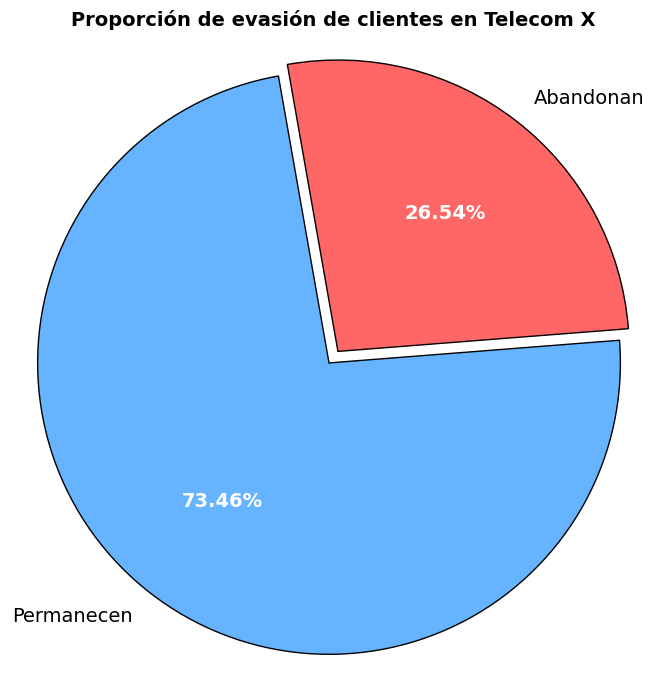

In [40]:
proporcion_evasion().show()

In [41]:
def distribucion_evasion():
    # Contar cantidad de clientes que evaden y permanecen
    conteo_evasion = df['Evasion'].value_counts()

    # Orden de categorías
    estados = ['Sí', 'No']  # 'Sí' → Abandona, 'No' → Permanece

    # Crear nuevo DataFrame para la comparativa
    comparativa_evasion = pd.DataFrame({
        'Cantidad': [conteo_evasion.get(e, 0) for e in estados]
    }, index=['Abandona', 'Permanece'])

    # Colores institucionales
    colores = [color_no, color_si]

    # Crear gráfico de barras
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.bar(
      comparativa_evasion.index,
      comparativa_evasion['Cantidad'],
      color=colores,
      edgecolor='black',
      width=0.4
)


    # Fondo
    ax.set_facecolor(color_interior)

    # Etiquetas de cantidad sobre cada barra
    for i, valor in enumerate(comparativa_evasion['Cantidad']):
        ax.text(
            i,
            valor + 100,
            str(valor),
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold',
            color='black'
        )

    # Título y etiquetas
    ax.set_title('Cantidad de clientes que permanecen y que abandonan Telecom X',
                 fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('')
    ax.set_xticks([0, 1])
    ax.set_xticklabels(['Abandona', 'Permanece'])
    plt.xticks(rotation=0)
    ax.set_ylim(0, 5600)
    plt.tight_layout()
    return plt

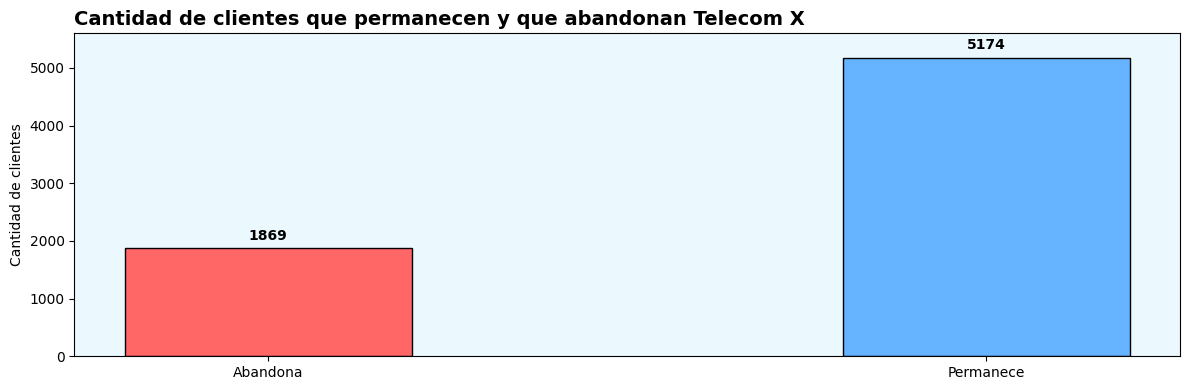

In [42]:
distribucion_evasion().show()

#### **2. Antigüedad vs Evasión de clientes**

In [43]:
def boxplot_antiguedad():

    # Crear figura
    fig, ax = plt.subplots(figsize=(9, 6))

    # Boxplot con hue para evitar warning
    sns.boxplot(
        data=df,
        x='Evasion',  # Compara "Sí" vs "No"
        y='MesesAntiguedad',
        hue='Evasion',
        palette={'Sí': color_no, 'No': color_si},
        ax=ax,
        boxprops=dict(edgecolor='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markeredgecolor='black')
    )

    # Estética
    ax.set_title('Antigüedad de clientes: Permanecen vs. Abandonaron',
                fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Meses de antigüedad')
    ax.set_facecolor(color_interior)
    # Asegura que los ticks estén fijos en 0 y 1 (posiciones de las categorías)
    ax.set_xticks([0, 1])
    # Asigna las etiquetas
    ax.set_xticklabels(['Permanecen', 'Abandonaron'])

    plt.tight_layout()
    return plt

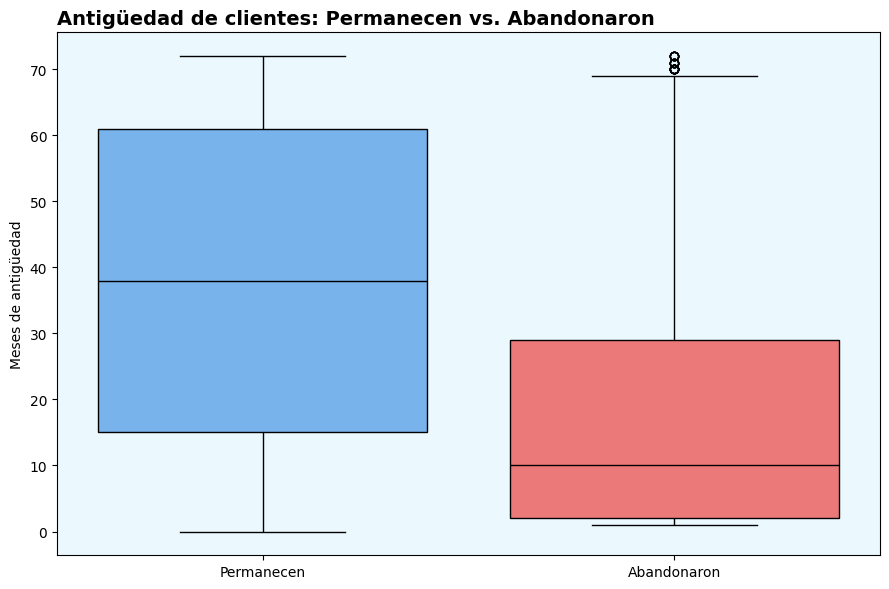

In [44]:
boxplot_antiguedad().show()

In [45]:
def distribucion_antiguedad():

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(12, 4))

    # Histograma con Seaborn usando el eje `ax`
    sns.histplot(
        data=df,
        x='MesesAntiguedad',
        hue='Evasion',
        palette={'Sí': color_no, 'No': color_si},
        multiple='stack',
        bins=np.arange(0, 76, 3),
        edgecolor='black',
        element='bars',
        stat='count',
        ax=ax  # <- aquí se indica el eje
    )

    # Personalización completa desde `ax`
    ax.set_title('Distribución de Antigüedad por Estado del Cliente', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Meses de antigüedad')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)
    ax.yaxis.set_major_locator(MultipleLocator(100))

    # Leyenda traducida y título
    ax.legend(title='Estado del cliente', labels=['Abandona', 'Permanece'])

    # Ajustar diseño
    plt.tight_layout()
    return plt

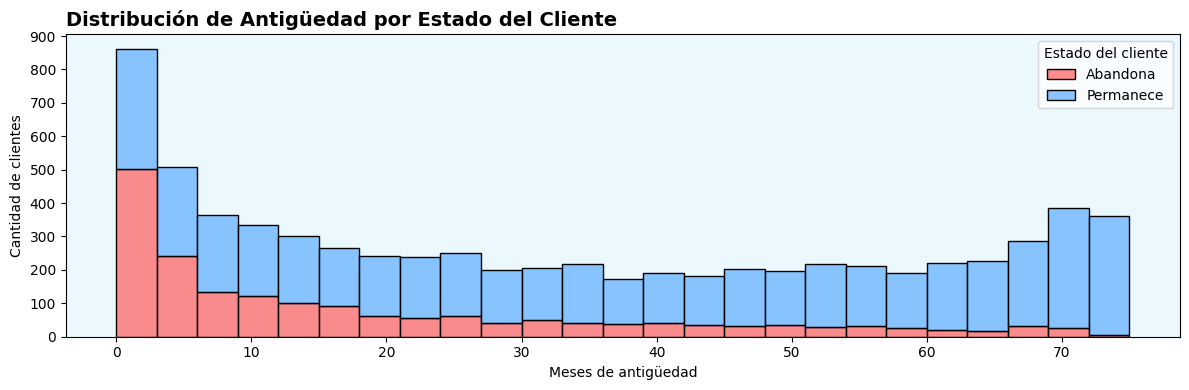

In [46]:
distribucion_antiguedad().show()

In [47]:
def distribucion_evasion_antiguedad():

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(12, 4))

    # Histograma directamente desde df_evasion
    ax.hist(
        df_evasion['MesesAntiguedad'],
        bins=np.arange(0, 76, 3),
        color=color_no,
        edgecolor='black'
    )

    # Estética del gráfico
    ax.set_title('Distribución de Abandono de clientes por Mes de Antigüedad', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Mes en que abandonó')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)
    ax.yaxis.set_major_locator(MultipleLocator(100))

    # Ajustar diseño
    plt.tight_layout()
    return plt

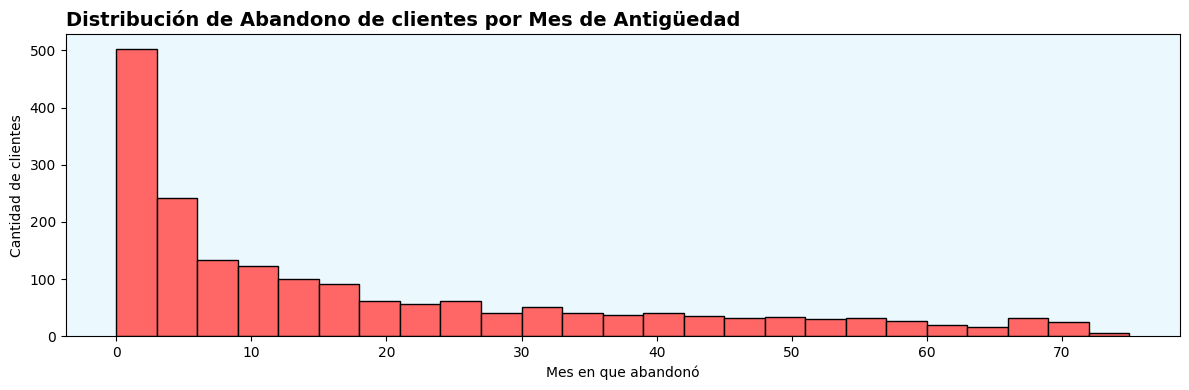

In [48]:
distribucion_evasion_antiguedad().show()

#### **3. Proporción de clientes por Género**

In [49]:
# Cantidad de clientes por género
df_evasion['Genero'].value_counts()

,count
Genero,
Femenino,939
Masculino,930


In [50]:
def proporcion_evasion_genero():

    # Contar la cantidad de usuarios según su género
    evasion_genero = df_evasion['Genero'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = ['Mujeres','Hombres']

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(7, 7))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        evasion_genero,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=40,
        colors=[color_femenino, color_masculino],
        explode=(0.05, 0),
        textprops= {'fontsize': 14, 'color':'black'},
        wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
        pctdistance=0.8
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(15)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Evasión de clientes: ¿Cuál es su género?', fontsize=14, fontweight='bold', loc='center')
    ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

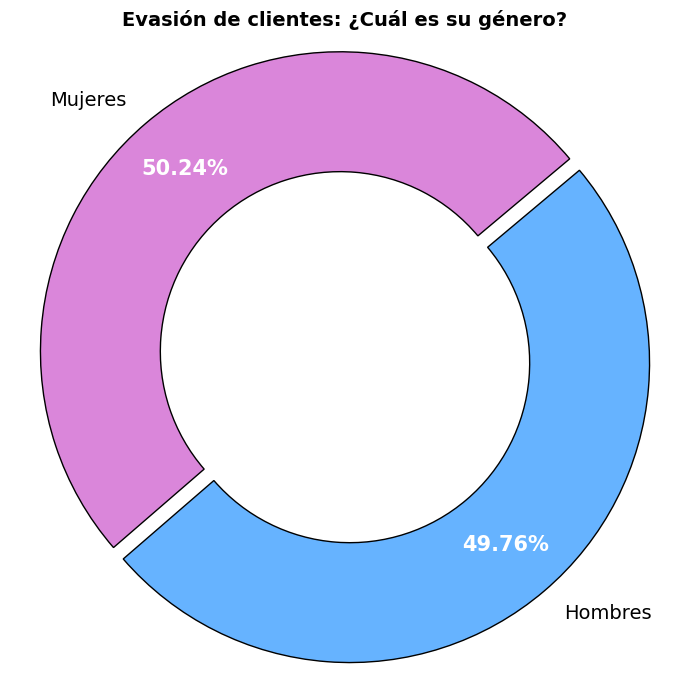

In [51]:
proporcion_evasion_genero().show()

#### **4. Proporción de Adultos Mayores y Antigüedad como clientes**

In [52]:
# Cantidad de clientes que son o no adultos mayores
df_evasion['AdultoMayor'].value_counts()

,count
AdultoMayor,
No,1393
Sí,476


In [53]:
def proporcion_evasion_a_mayor():

    # Porcentaje de Evasión en Adultos Mayores
    evasion_adulto_m = df_evasion['AdultoMayor'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = ['No es\nAdulto Mayor','Es\nAdulto Mayor']

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(7, 7))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        evasion_adulto_m,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=94,
        colors=[color_no,color_si],
        explode=(0.05, 0),
        textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
        wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
        pctdistance=0.8,
        labeldistance=1.2
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(15)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Evasión de clientes: ¿Adultos Mayores abandonan menos?', fontsize=14, fontweight='bold', loc='center')
    ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

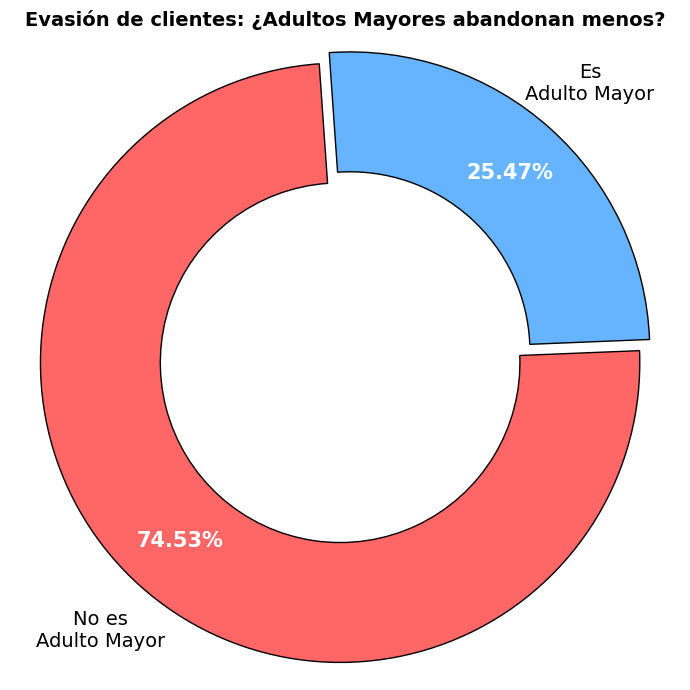

In [54]:
proporcion_evasion_a_mayor().show()

In [55]:
def boxplot_permanecen_antiguedad_a_mayor():

    # Crear gráfico desde df_no_evasion con columna virtual 'GrupoEdad'
    fig, ax = plt.subplots(figsize=(9, 6))

    sns.boxplot(
        data=df_no_evasion.copy().assign(
            GrupoEdad=lambda df: df['AdultoMayor'].map({'Sí': 'Adultos Mayores'}).fillna('Otros')
        ),
        x='GrupoEdad',
        y='MesesAntiguedad',
        hue='GrupoEdad',  # <- necesario para evitar warning
        palette={'Adultos Mayores': color_si, 'Otros': color_no},
        legend=False,
        boxprops=dict(edgecolor='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markeredgecolor='black'),
        ax=ax
    )

    # Estética del gráfico
    ax.set_title('Antigüedad de clientes que permanecen:\nAdultos Mayores vs Otros',
                fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Meses de antigüedad')
    ax.set_facecolor(color_interior)

    plt.tight_layout()
    return plt

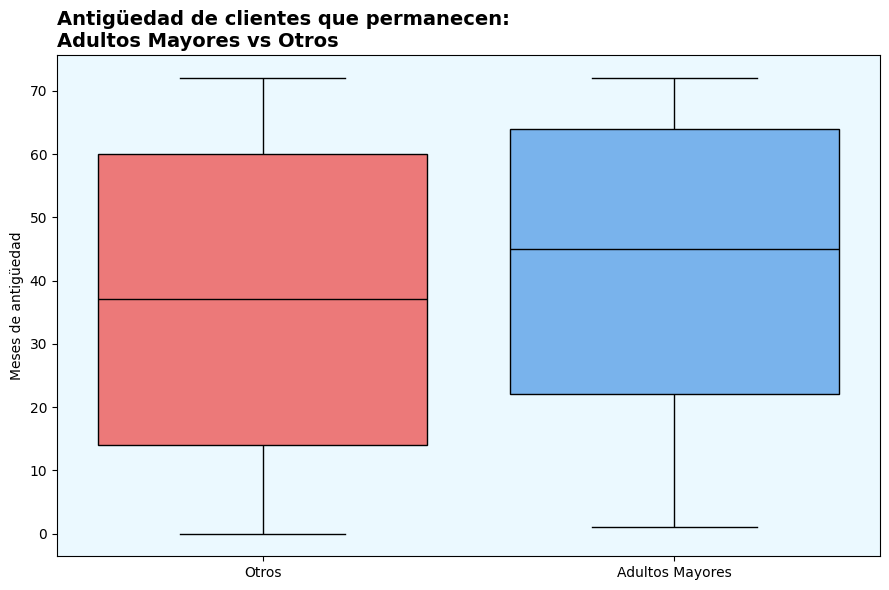

In [56]:
boxplot_permanecen_antiguedad_a_mayor().show()

In [57]:
def distribucion_permanecen_antiguedad_a_mayor():

    # Asegurarse que 'MesesAntiguedad' es numérico sin warning
    df_no_evasion.loc[:, 'MesesAntiguedad'] = pd.to_numeric(df_no_evasion['MesesAntiguedad'], errors='coerce')

    # Definir bins comunes
    bins_comunes = np.histogram_bin_edges(df_no_evasion['MesesAntiguedad'].dropna(), bins=15)

    # Graficar histogramas comparativos
    fig, ax = plt.subplots(figsize=(12, 6))

    # Histograma para no adultos mayores
    ax.hist(df_no_evasion[df_no_evasion['AdultoMayor'] == 'No']['MesesAntiguedad'],
            bins=bins_comunes, alpha=0.5, label='Otros',
            color=color_no, edgecolor='black',align='mid')

    # Histograma para adultos mayores
    ax.hist(df_no_evasion[df_no_evasion['AdultoMayor'] == 'Sí']['MesesAntiguedad'],
            bins=bins_comunes, alpha=0.6, label='Adultos mayores',
            color=color_si, edgecolor='black', align='mid')

    # Estética
    ax.set_title('Distribución de Antigüedad en clientes que PERMANECEN en Telecom X:\nAdultos Mayores vs otros clientes',
                fontsize=14, fontweight='bold',loc='left')
    ax.set_xlabel('Meses de antigüedad')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)
    ax.legend()
    plt.tight_layout()
    return plt

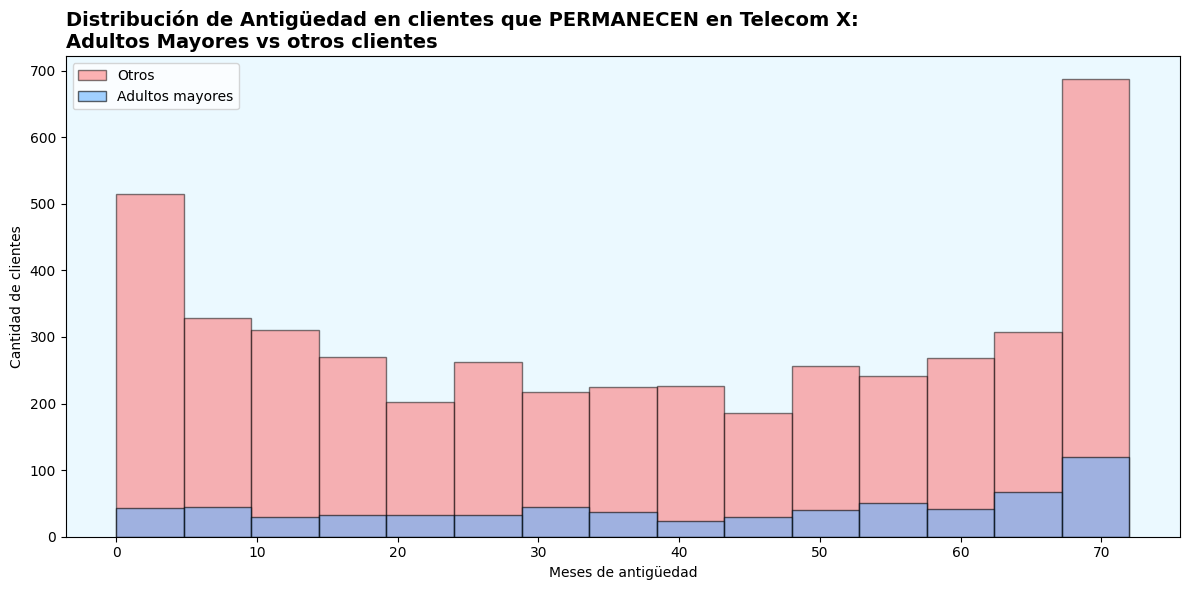

In [58]:
distribucion_permanecen_antiguedad_a_mayor().show()

In [59]:
def boxplot_evasion_antiguedad_a_mayor():

    # Crear gráfico sin crear df_comparativo
    fig, ax = plt.subplots(figsize=(9, 6))
    sns.boxplot(
        data=df_evasion.copy().assign(
            Grupo=lambda df: df['AdultoMayor'].map({'Sí': 'Adultos Mayores'}).fillna('Otros')
        ),
        x='Grupo',
        y='MesesAntiguedad',
        hue='Grupo',
        palette={'Adultos Mayores': color_si, 'Otros': color_no},
        boxprops=dict(edgecolor='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markeredgecolor='black'),
        ax=ax
    )

    # Estética
    ax.set_title('Antigüedad de clientes que abandonaron:\nAdultos Mayores vs. Otros',
                fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('Meses de antigüedad')
    ax.set_facecolor(color_interior)

    plt.tight_layout()
    return plt

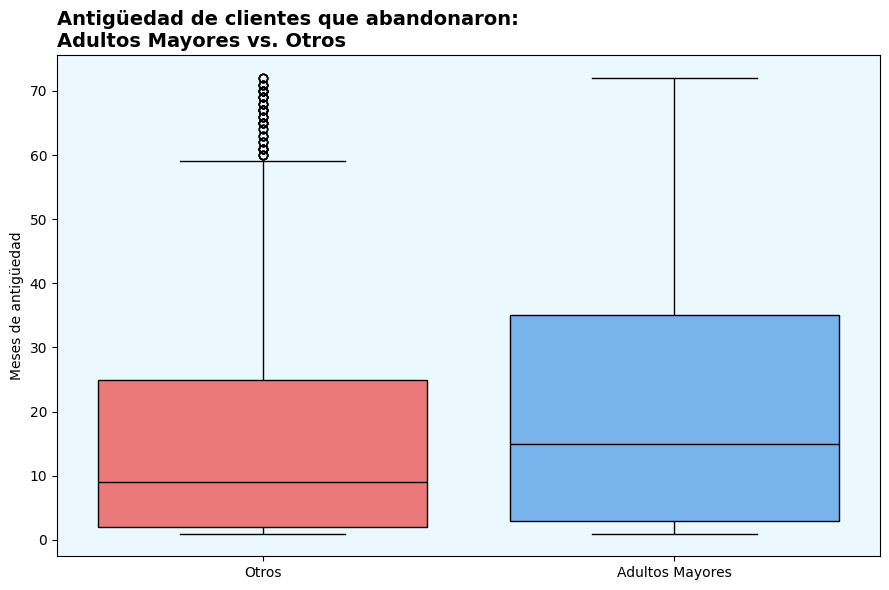

In [60]:
boxplot_evasion_antiguedad_a_mayor().show()

In [61]:
def distribucion_evasion_antiguedad_a_mayor():

    # Asegurar que 'MesesAntiguedad' es numérico sin warning
    df_evasion.loc[:, 'MesesAntiguedad'] = pd.to_numeric(df_evasion['MesesAntiguedad'], errors='coerce')

    # Definir bins comunes
    bins_comunes = np.histogram_bin_edges(df_evasion['MesesAntiguedad'].dropna(), bins=15)

    # Graficar histogramas
    fig, ax = plt.subplots(figsize=(12, 6))

    # Histograma para no adultos mayores
    ax.hist(df_evasion[df_evasion['AdultoMayor'] == 'No']['MesesAntiguedad'],
            bins=bins_comunes, alpha=0.5, label='Otros',
            color=color_no, align='mid',edgecolor='black')

    # Histograma para adultos mayores
    ax.hist(df_evasion[df_evasion['AdultoMayor'] == 'Sí']['MesesAntiguedad'],
            bins=bins_comunes, alpha=0.6, label='Adultos mayores',
            color=color_si, align='mid',edgecolor='black')

    # Estética
    ax.set_title('Distribución de Antigüedad en clientes que ABANDONARON Telecom X:\nAdultos Mayores vs otros clientes',
                fontsize=14, fontweight='bold',loc='left')
    ax.set_xlabel('Meses de antigüedad')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)
    ax.legend()
    plt.tight_layout()
    return plt

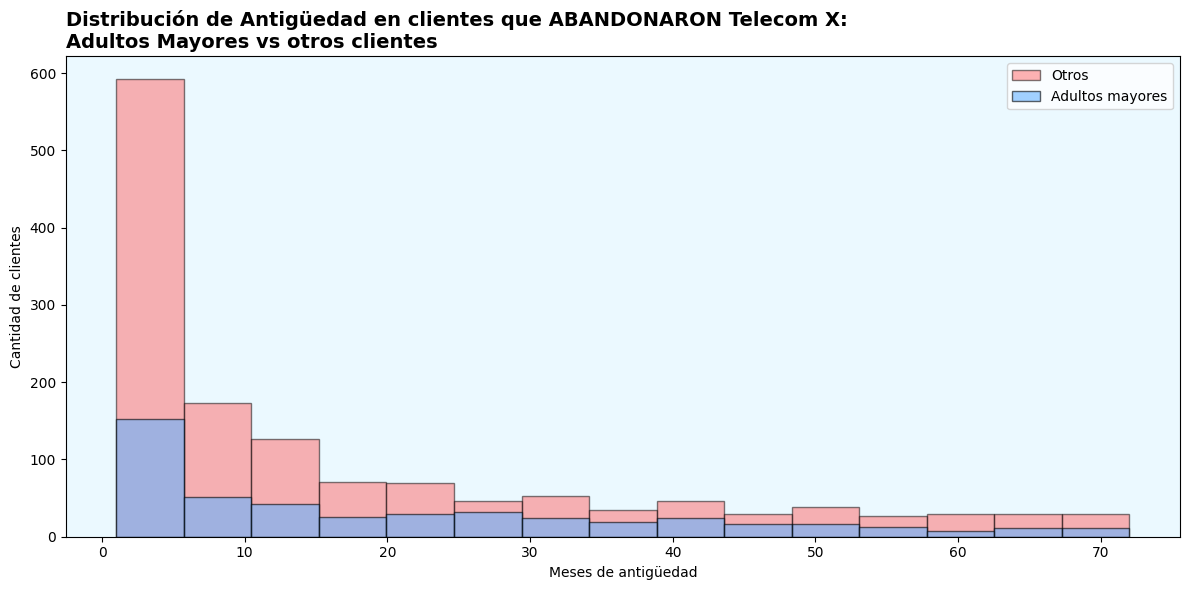

In [62]:
distribucion_evasion_antiguedad_a_mayor().show()

#### **5. Cliente: ¿Tiene pareja? ¿Tiene dependientes?**

In [63]:
# Cantidad de clientes que tienen o no pareja
df_evasion['TienePareja'].value_counts()

,count
TienePareja,
No,1200
Sí,669


In [64]:
def proporcion_evasion_parejas():

    # Porcentaje de evasión en clientes con pareja
    evasion_pareja = df_evasion['TienePareja'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = ['No tiene\nPareja','Tiene Pareja']

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(7, 7))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        evasion_pareja,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=110,
        colors=[color_no,color_si],
        explode=(0.05, 0),
        textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
        wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
        pctdistance=0.8,
        labeldistance=1.2
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(15)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Evasión de clientes: ¿Tienen Pareja?', fontsize=14, fontweight='bold')
    ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

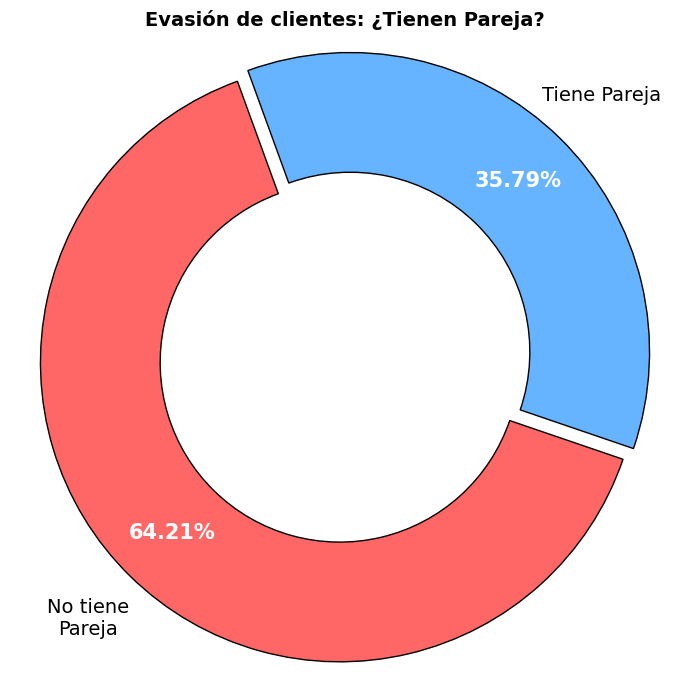

In [65]:
proporcion_evasion_parejas().show()

In [66]:
def distribucion_parejas():

    # Contar clientes por estado civil para ambos grupos
    evasion_pareja = df_evasion['TienePareja'].value_counts()
    no_evasion_pareja = df_no_evasion['TienePareja'].value_counts()

    # Orden de categorías
    tiene_pareja = ['No', 'Sí']

    # Crear nuevo DataFrame
    comparativa_pareja = pd.DataFrame({
        'Abandona': [evasion_pareja.get(m, 0) for m in tiene_pareja],
        'Permanece': [no_evasion_pareja.get(m, 0) for m in tiene_pareja]
    }, index=tiene_pareja)

    # Colores personalizados
    colores = [color_no, color_si]

    # Gráfico
    fig, ax = plt.subplots(figsize=(12, 4))
    comparativa_pareja.plot(
        kind='bar',
        stacked=True,
        color=colores,
        edgecolor='black',
        width=0.3,
        ax=ax
    )

    # Fondo
    ax.set_facecolor(color_interior)

    # Agregar etiquetas a las barras
    for i, pareja in enumerate(tiene_pareja):
        abandona = comparativa_pareja.loc[pareja, 'Abandona']
        permanece = comparativa_pareja.loc[pareja, 'Permanece']

        if abandona > 0:
            ax.text(i, abandona / 2, str(abandona), ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white')

        if permanece > 0:
            ax.text(i, abandona + (permanece - 5), str(permanece), ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

    # Título y etiquetas
    ax.set_title('Comparativa de clientes con o sin pareja', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('')
    ax.set_xticks([0, 1])  # Para garantizar que los ticks estén en el orden adecuado
    ax.set_xticklabels(['No tiene pareja', 'Tiene pareja'])
    plt.xticks(rotation=0)

    # Leyenda
    plt.legend(title='Estado del cliente', loc='upper right')

    plt.tight_layout() # Ajustar para que todo encaje bien
    return plt

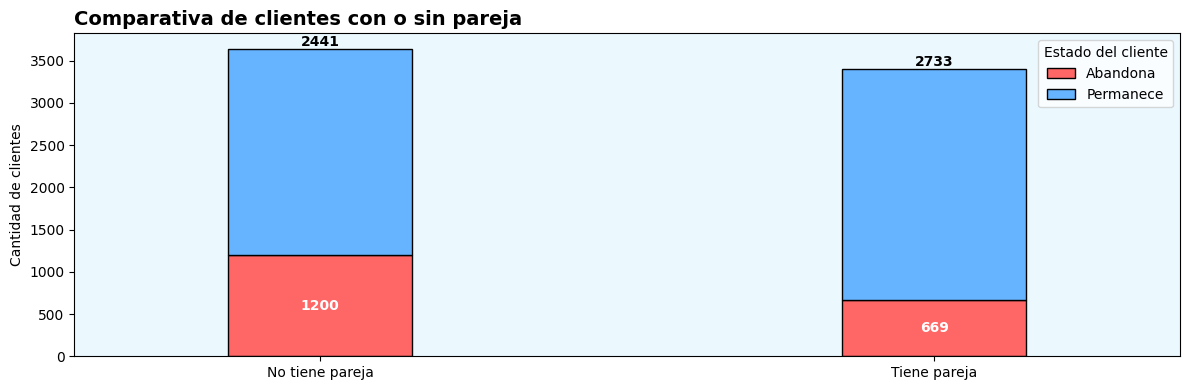

In [67]:
distribucion_parejas().show()

In [68]:
pd.crosstab(df['TienePareja'], df['Evasion'])

Evasion,No,Sí
TienePareja,,
No,2441,1200
Sí,2733,669


In [69]:
# Cantidad de clientes que tienen o no dependientes
df_evasion['Dependientes'].value_counts()

,count
Dependientes,
No,1543
Sí,326


In [70]:
def proporcion_evasion_dependientes():

    # Porcentaje de evasión en clientes con pareja
    evasion_dependientes = df_evasion['Dependientes'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = [ 'No tiene\nDependientes','Tiene\nDependientes']

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(7, 7))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        evasion_dependientes,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=78,
        colors=[color_no, color_si],
        wedgeprops={'width': 0.4,'edgecolor': 'black', 'linewidth': 1},
        explode=(0.05, 0),
        textprops= {'fontsize': 14, 'color':'black','ha': 'center'},
        pctdistance=0.8,
        labeldistance=1.2
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(15)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Evasión de clientes: Sin dependientes abandonan más', fontsize=14, fontweight='bold')
    ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

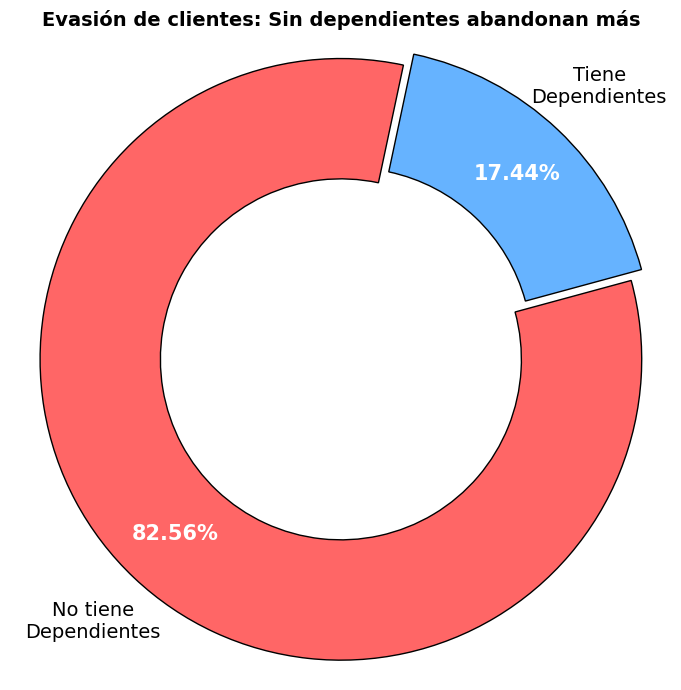

In [71]:
proporcion_evasion_dependientes().show()

#### **6. Tipo de contrato y servicios contratados**

##### **Tipo de contrato**

In [72]:
def distribucion_evasion_antiguedad_contrato():

    # Crear figura y eje
    fig, ax = plt.subplots(figsize=(12, 5))

    # Crear gráfico horizontal apilado
    (
        df[df['Evasion'] == 'Sí']
        .assign(RangoAntiguedad=pd.cut(
            df[df['Evasion'] == 'Sí']['MesesAntiguedad'],
            bins=[0, 6, 12, 24, 36, 48, 60, 72],
            labels=['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'],
            include_lowest=True
        ))
        .groupby(['RangoAntiguedad', 'TipoContrato'], observed=False)
        .size()
        .unstack(fill_value=0)
        .reindex(['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72'])
        .plot(
            kind='barh',
            stacked=True,
            color=[color_1, color_2, color_5],
            edgecolor='black',
            ax=ax
        )
    )

    # Estética del gráfico
    ax.set_title('Distribución de Evasión por Rango de Antigüedad y Tipo de Contrato', fontsize=13, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('Rango de meses al abandonar')
    ax.set_facecolor(color_interior)
    ax.grid(axis='x', linestyle='--', alpha=0.4)
    ax.legend(title='Tipo de contrato', loc='upper right')

    # Ajustar y mostrar
    plt.tight_layout()
    return plt

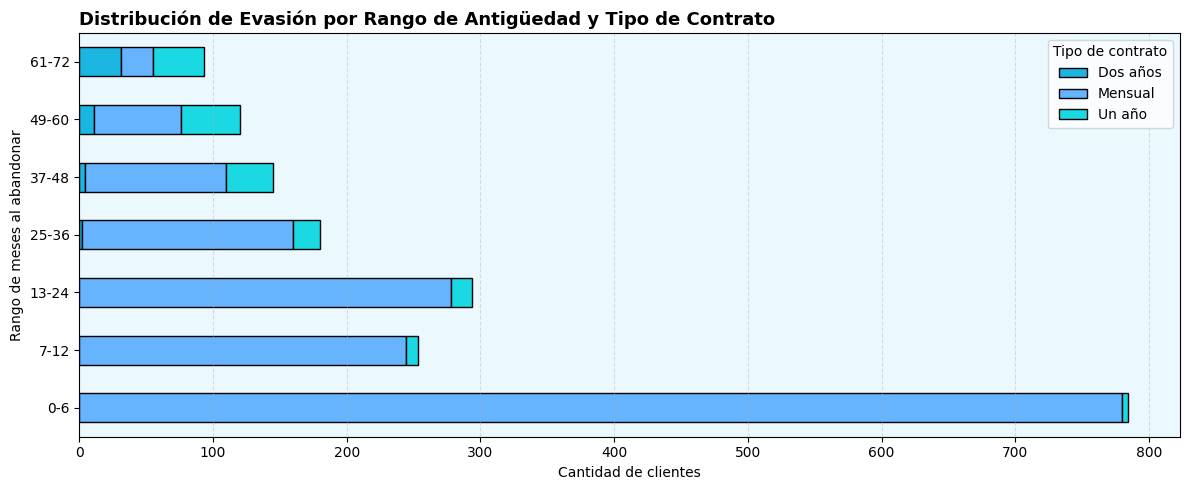

In [73]:
distribucion_evasion_antiguedad_contrato().show()

##### **Servicios contratados**

###### **Internet + Telefonía**

In [74]:
def distribucion_servicios():
    # Crear copia segura de los DataFrames
    evasion = df_evasion.copy()
    no_evasion = df_no_evasion.copy()

    # Clasificación en evasion
    cond_internet_ev = evasion['ServicioInternet'].isin(['DSL', 'Fibra óptica'])
    cond_telefono_ev = evasion['ServicioTelefonico'] == 'Sí'

    evasion['TipoServicio'] = [
        'Internet y Telefonía' if internet and telefono else
        'Solo Internet' if internet else
        'Solo Telefonía' if telefono else
        'Ninguno'
        for internet, telefono in zip(cond_internet_ev, cond_telefono_ev)
    ]

    # Clasificación en no_evasion
    cond_internet_ne = no_evasion['ServicioInternet'].isin(['DSL', 'Fibra óptica'])
    cond_telefono_ne = no_evasion['ServicioTelefonico'] == 'Sí'

    no_evasion['TipoServicio'] = [
        'Internet y Telefonía' if internet and telefono else
        'Solo Internet' if internet else
        'Solo Telefonía' if telefono else
        'Ninguno'
        for internet, telefono in zip(cond_internet_ne, cond_telefono_ne)
    ]

    # Contar valores
    servicios_orden = ['Internet y Telefonía', 'Solo Internet', 'Solo Telefonía']
    conteo_ev = evasion['TipoServicio'].value_counts()
    conteo_ne = no_evasion['TipoServicio'].value_counts()

    comparativa = pd.DataFrame({
        'Abandonaron': conteo_ev.reindex(servicios_orden, fill_value=0),
        'Permanecen': conteo_ne.reindex(servicios_orden, fill_value=0)
    })

    # Crear gráfico
    fig, ax = plt.subplots(figsize=(10, 7))
    ax.bar(
        comparativa.index,
        comparativa['Abandonaron'],
        label='Abandonaron',
        color=color_no,
        edgecolor='black'
    )
    ax.bar(
        comparativa.index,
        comparativa['Permanecen'],
        bottom=comparativa['Abandonaron'],
        label='Permanecen',
        color=color_si,
        edgecolor='black'
    )

    ax.set_facecolor(color_interior)

    for i, servicio in enumerate(comparativa.index):
        val_ab = comparativa.loc[servicio, 'Abandonaron']
        val_pe = comparativa.loc[servicio, 'Permanecen']

        if val_ab > 0:
            ax.text(i, val_ab / 2, str(val_ab), ha='center', va='center', color='white', fontweight='bold')
        if val_pe > 0:
            ax.text(i, val_ab + val_pe + 5, str(val_pe), ha='center', va='bottom', color='black', fontweight='bold')

    ax.set_title('Comparativa de clientes según combinación de servicios contratados', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('')
    ax.set_xticks(range(len(comparativa.index)))
    ax.set_xticklabels(comparativa.index, rotation=0)
    ax.legend(title='Estado del cliente', loc='upper right')

    plt.tight_layout()
    return plt

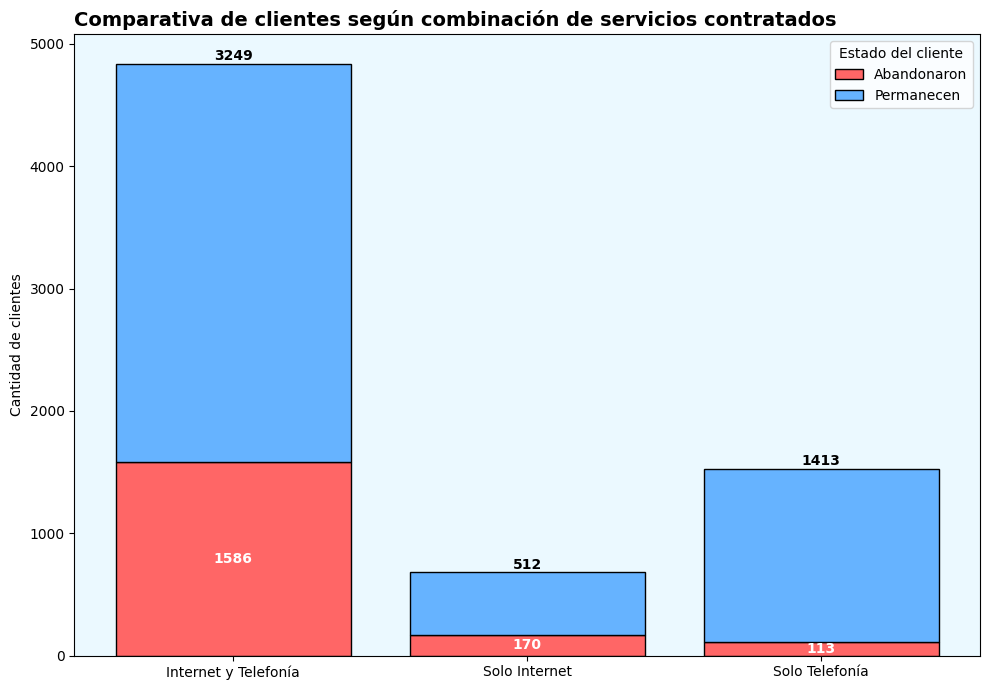

In [75]:
distribucion_servicios().show()

In [76]:
# Función auxiliar para clasificar el tipo de servicio
def clasificar_servicio(row):
    if row['ServicioInternet'] in ['DSL', 'Fibra óptica']:
        telefono = 'Telefonía' if row['ServicioTelefonico'] == 'Sí' else 'Sin Telefonía'
        return f"{telefono} + {row['ServicioInternet']}"
    return None

# Función que retorna el gráfico de clientes CON dependientes
def distribucion_con_dependientes():
    df_dependientes = df_evasion[df_evasion['Dependientes'] == 'Sí'].copy()

    bins = [0, 6, 12, 24, 36, 48, 60, 72]
    labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
    df_dependientes['RangoAntiguedad'] = pd.cut(df_dependientes['MesesAntiguedad'], bins=bins, labels=labels)
    df_dependientes['TipoServicioCombinado'] = df_dependientes.apply(clasificar_servicio, axis=1)
    df_dependientes = df_dependientes.dropna(subset=['TipoServicioCombinado'])

    colores_servicios = {
        'Telefonía + DSL': color_1,
        'Telefonía + Fibra óptica': color_6,
        'Sin Telefonía + DSL': color_2,
        'Sin Telefonía + Fibra óptica': color_5
    }

    tabla = pd.crosstab(df_dependientes['RangoAntiguedad'], df_dependientes['TipoServicioCombinado'])
    tabla = tabla[[col for col in colores_servicios if col in tabla.columns]]

    fig, ax = plt.subplots(figsize=(12, 4))
    tabla.plot(kind='barh', stacked=True,
               color=[colores_servicios[c] for c in tabla.columns],
               ax=ax, edgecolor='black')

    ax.set_title('Distribución de Evasión por Rango de Antigüedad y Tipo de Servicio:\nClientes con Dependientes',
                 fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('Rango de meses al abandonar')
    ax.set_facecolor(color_interior)
    ax.set_xlim(0, 615)
    ax.legend(title='Tipo de servicio')
    plt.tight_layout()

    return plt

# Función que retorna el gráfico de clientes SIN dependientes
def distribucion_sin_dependientes():
    df_sindep = df_evasion[df_evasion['Dependientes'] == 'No'].copy()

    bins = [0, 6, 12, 24, 36, 48, 60, 72]
    labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
    df_sindep['RangoAntiguedad'] = pd.cut(df_sindep['MesesAntiguedad'], bins=bins, labels=labels)
    df_sindep['TipoServicioCombinado'] = df_sindep.apply(clasificar_servicio, axis=1)
    df_sindep = df_sindep.dropna(subset=['TipoServicioCombinado'])

    colores_servicios = {
        'Telefonía + DSL': color_1,
        'Telefonía + Fibra óptica': color_6,
        'Sin Telefonía + DSL': color_2,
        'Sin Telefonía + Fibra óptica': color_5
    }

    tabla = pd.crosstab(df_sindep['RangoAntiguedad'], df_sindep['TipoServicioCombinado'])
    tabla = tabla[[col for col in colores_servicios if col in tabla.columns]]

    fig, ax = plt.subplots(figsize=(12, 4))
    tabla.plot(kind='barh', stacked=True,
               color=[colores_servicios[c] for c in tabla.columns],
               ax=ax, edgecolor='black')

    ax.set_title('Distribución de Evasión por Rango de Antigüedad y Tipo de Servicio:\nClientes sin Dependientes',
                 fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('Rango de meses al abandonar')
    ax.set_facecolor(color_interior)
    ax.set_xlim(0, 615)
    ax.legend(title='Tipo de servicio')
    plt.tight_layout()

    return plt

# Función para mostrarlos juntos (en visualización, no para exportar)
def distribucion_evasion_antiguedad_con_sin_dependientes():
    distribucion_con_dependientes().show()
    distribucion_sin_dependientes().show()

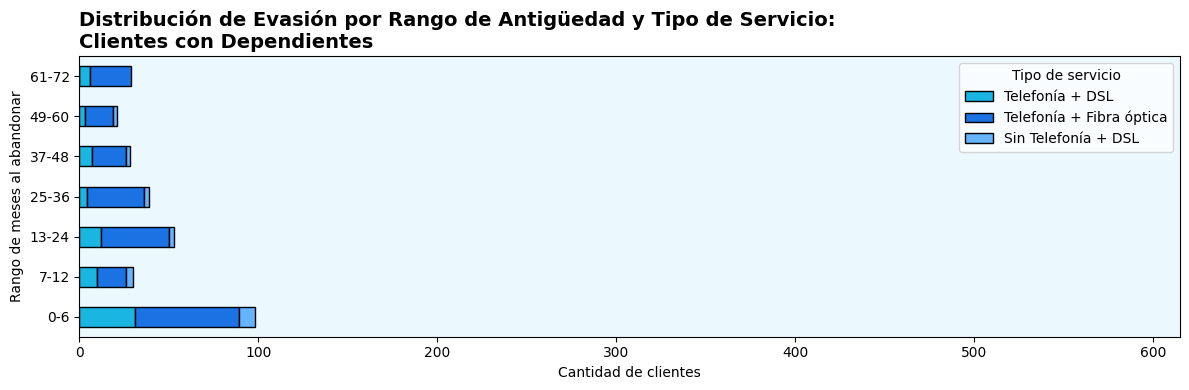

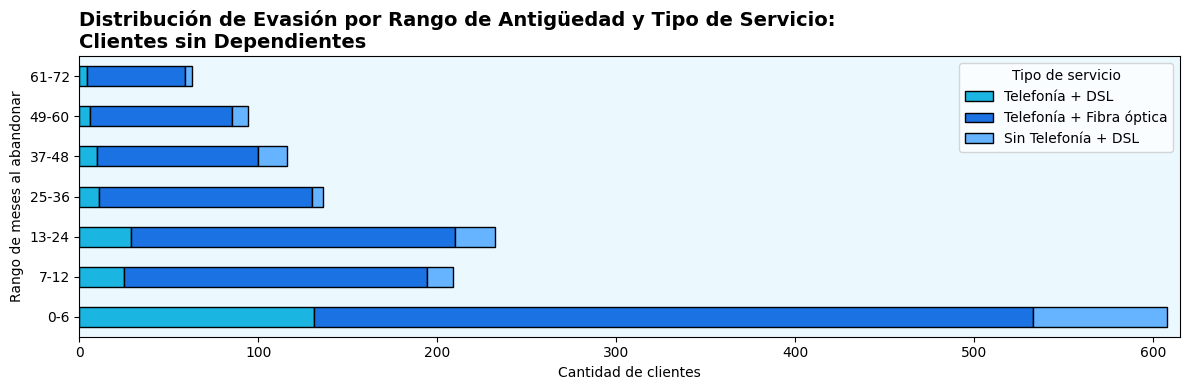

In [77]:
distribucion_evasion_antiguedad_con_sin_dependientes()

In [78]:
def distribucion_evasion_antiguedad_con_dependientes():

    # Distribución de Abandono por Rango de Antigüedad y Tipo de Servicio: Clientes con dependientes

    # Filtrar solo clientes dependientes que abandonaron
    df_dependientes = df_evasion[df_evasion['Dependientes'] == 'Sí'].copy()

    # Crear rangos de antigüedad en meses
    bins = [0, 6, 12, 24, 36, 48, 60, 72]
    labels = ['0-6', '7-12', '13-24', '25-36', '37-48', '49-60', '61-72']
    df_dependientes['RangoAntiguedad'] = pd.cut(df_dependientes['MesesAntiguedad'], bins=bins, labels=labels, right=True)

    # Crear columna combinada de tipo de servicio (solo DSL o Fibra óptica)
    def clasificar_servicio(row):
        if row['ServicioInternet'] in ['DSL', 'Fibra óptica']:
            telefono = 'Telefonía' if row['ServicioTelefonico'] == 'Sí' else 'Sin Telefonía'
            return f"{telefono} + {row['ServicioInternet']}"
        else:
            return None  # Excluir combinaciones no deseadas

    df_dependientes['TipoServicioCombinado'] = df_dependientes.apply(clasificar_servicio, axis=1)
    df_dependientes = df_dependientes.dropna(subset=['TipoServicioCombinado'])  # Eliminar filas con servicios no válidos

    # Tabla cruzada: TipoServicioCombinado vs RangoAntiguedad
    tabla = pd.crosstab(df_dependientes['RangoAntiguedad'], df_dependientes['TipoServicioCombinado'])

    # Colores personalizados
    colores_servicios = {
        'Telefonía + DSL': color_1,
        'Telefonía + Fibra óptica': color_6,
        'Sin Telefonía + DSL': color_2,
        'Sin Telefonía + Fibra óptica': color_5
    }

    # Asegurar orden de columnas
    tabla = tabla[[col for col in colores_servicios if col in tabla.columns]]

    # Gráfico
    fig, ax = plt.subplots(figsize=(12, 4))
    tabla.plot(kind='barh', stacked=True, color=[colores_servicios[c] for c in tabla.columns], ax=ax, edgecolor='black')

    # Estética
    ax.set_title('Distribución de Evasión por Rango de Antigüedad y Tipo de Servicio:\nClientes con dependientes', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('Rango de meses al abandonar')
    ax.set_facecolor(color_interior)
    ax.legend(title='Tipo de servicio')
    ax.set_xlim(0, 100)
    plt.tight_layout()
    return plt


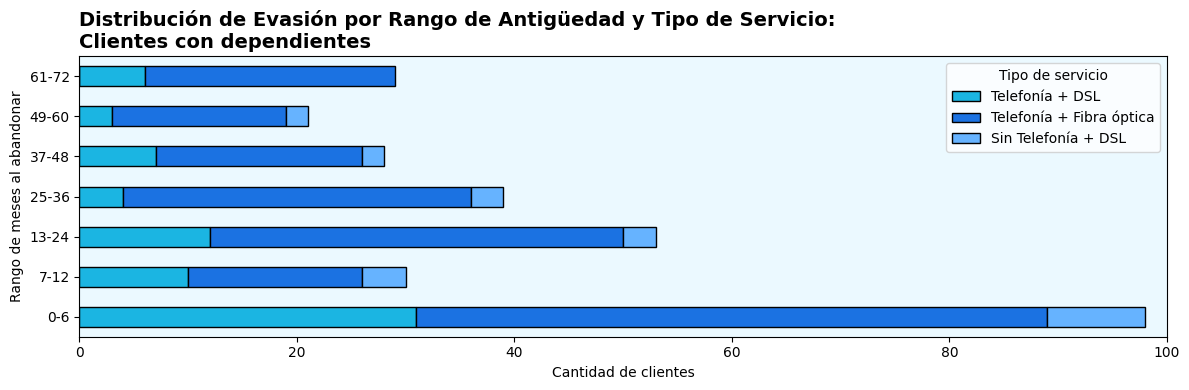

In [79]:
distribucion_evasion_antiguedad_con_dependientes().show()

In [80]:
df_evasion['ServicioInternet'].value_counts()


,count
ServicioInternet,
Fibra óptica,1297
DSL,459
No,113


###### **Solo Telefonía**

In [81]:
def distribucion_telefonia():

    # Filtrar clientes con servicio telefónico
    df_tel = df[df['ServicioTelefonico'] == 'Sí'].copy()

    # Eliminar los que tienen "Sin servicio telefónico" en LineasMultiples
    df_tel = df_tel[df_tel['LineasMultiples'] != 'Sin servicio telefónico']

    # Renombrar categorías para mayor claridad
    df_tel['LineasMultiples'] = df_tel['LineasMultiples'].replace({
        'Sí': 'Líneas múltiples',
        'No': 'Una línea'
    })
    df_tel['Evasion'] = df_tel['Evasion'].replace({
        'Sí': 'Abandona',
        'No': 'Permanece'
    })

    # Tabla cruzada: Evasion vs LineasMultiples
    tabla = pd.crosstab(df_tel['Evasion'], df_tel['LineasMultiples'])

    # Ordenar columnas
    tabla = tabla[['Una línea', 'Líneas múltiples']]

    # Colores personalizados
    colores = [color_1, color_2]
    # Color interior


    # Crear gráfico
    fig, ax = plt.subplots(figsize=(12, 4))
    barras = tabla.plot(kind='barh', stacked=True, color=colores, edgecolor='black', ax=ax)

    ax.set_facecolor(color_interior)

    # Etiquetas de cantidad dentro de cada barra
    for i, (indice, fila) in enumerate(tabla.iterrows()):
        acumulado = 0
        for j, valor in enumerate(fila):
            if valor > 0:
                ax.text(acumulado + valor / 2, i, str(valor), ha='center', va='center', fontsize=10, color='white', fontweight='bold')
                acumulado += valor

    # Estética
    ax.set_title('Distribución de evasión y permanencia según cantidad de líneas telefónicas', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('')
    ax.set_facecolor(color_interior)  # tu color de fondo institucional
    ax.legend(title='Cantidad de líneas')
    ax.set_xlim(0, 4800)
    plt.tight_layout()
    return plt

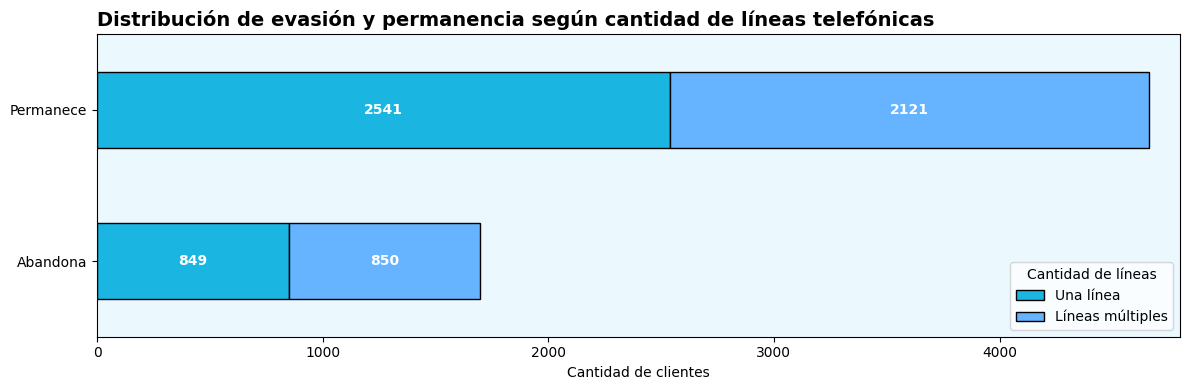

In [82]:
distribucion_telefonia().show()

###### **Solo Internet**

In [83]:
def distribucion_internet():
    # Filtrar clientes que sí tienen servicio de internet directamente desde df
    df_internet = df[df['ServicioInternet'] != 'No'].copy()

    # Renombrar categorías
    df_internet['ServicioInternet'] = df_internet['ServicioInternet'].replace({
        'DSL': 'DSL',
        'Fibra óptica': 'Fibra óptica'
    })
    df_internet['Evasion'] = df_internet['Evasion'].replace({
        'Sí': 'Abandona',
        'No': 'Permanece'
    })

    # Crear tabla cruzada: Evasion vs Tipo de Servicio de Internet
    tabla = pd.crosstab(df_internet['Evasion'], df_internet['ServicioInternet'])

    # Ordenar columnas (por claridad)
    tabla = tabla[['DSL', 'Fibra óptica']]

    # Colores personalizados
    colores = [color_1, color_2]
    fig, ax = plt.subplots(figsize=(12, 4))

    # Crear gráfico
    tabla.plot(
        kind='barh',
        stacked=True,
        color=colores,
        edgecolor='black',
        ax=ax
    )

    # Fondo
    ax.set_facecolor(color_interior)

    # Etiquetas internas
    for i, (estado, fila) in enumerate(tabla.iterrows()):
        acumulado = 0
        for j, valor in enumerate(fila):
            if valor > 0:
                ax.text(
                    acumulado + valor / 2,
                    i,
                    str(valor),
                    ha='center',
                    va='center',
                    fontsize=10,
                    color='white',
                    fontweight='bold'
                )
                acumulado += valor

    # Estética
    ax.set_title('Distribución de evasión y permanencia según tipo de servicio de Internet',
                 fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('Cantidad de clientes')
    ax.set_ylabel('')
    ax.set_xlim(0, 4200)
    ax.legend(title='Tipo de internet')
    plt.tight_layout()
    return plt

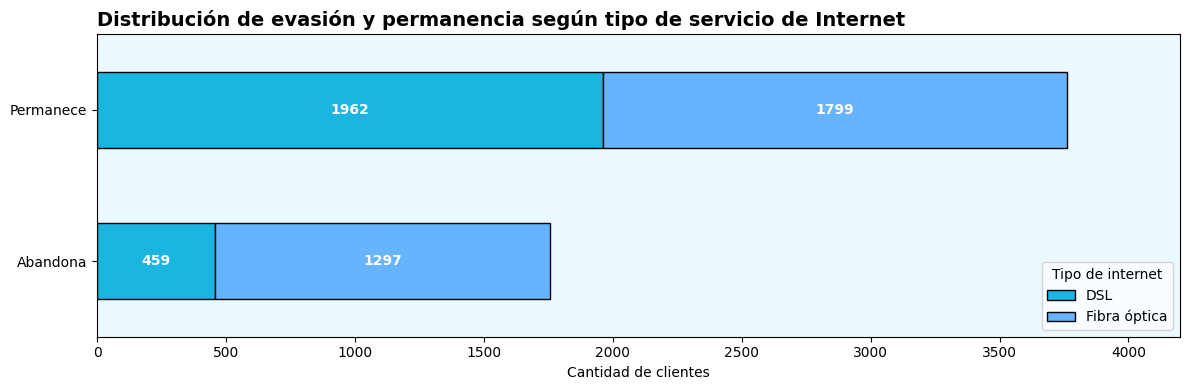

In [84]:
distribucion_internet().show()

In [85]:
def proporcion_evasion_internet():

    # Conteo de clientes que abandonaron según servicio de internet
    evasion_servicio_internet = df_evasion['ServicioInternet'].value_counts()

    # Etiquetas personalizadas: nombre + cantidad + porcentaje
    etiquetas = [
        'Fibra óptica', 'DSL', 'No'
    ]

    # Crear gráfico pie
    fig, ax = plt.subplots(figsize=(7, 7))

    wedges, texts, autotexts = ax.pie(
        evasion_servicio_internet,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=190,
        colors=[color_1, color_2, color_6],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        explode=(0.02,0.02,0.02),
        textprops= {'fontsize': 14, 'color':'black'},
        labeldistance=1.1,
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(12)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Título
    ax.set_title(
        'Proporción de clientes que abandonaron vs Servicio de internet',
        fontsize=14, fontweight='bold', loc='center'
    )

    ax.axis('equal')
    plt.tight_layout()
    return plt

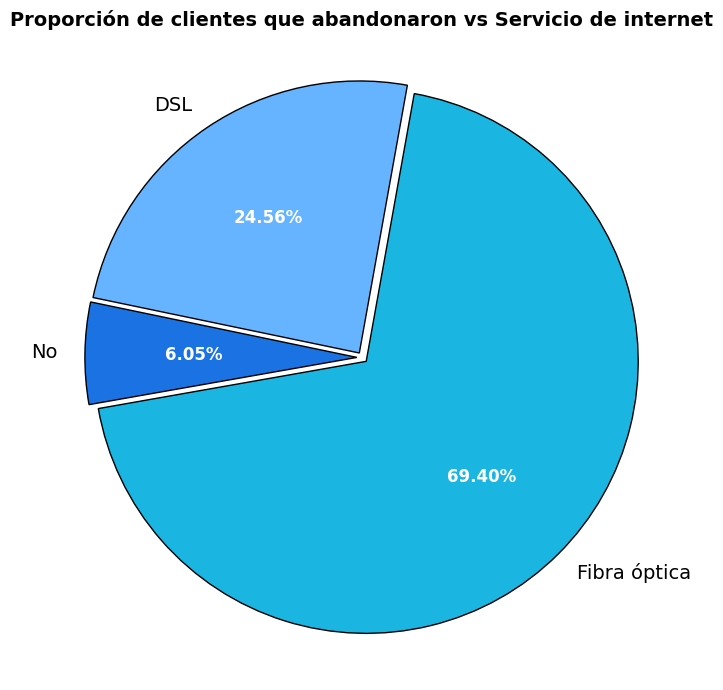

In [86]:
proporcion_evasion_internet().show()

In [87]:
def distribucion_evasion_servicios_adicionales():

    # Servicios adicionales a evaluar
    servicios = [
        'SeguridadEnLinea',
        'RespaldoEnLinea',
        'ProteccionDispositivo',
        'SoporteTecnico',
        'StreamingTV',
        'StreamingPeliculas'
    ]

    # Crear DataFrame base para almacenar conteo por categoría
    conteo_servicios = pd.DataFrame(columns=['Sí', 'No', 'Sin servicio de internet'], index=servicios)

    # Llenar el DataFrame con conteos por estado del servicio
    for col in servicios:
        conteo = df_evasion[col].value_counts()
        conteo_servicios.loc[col] = [
            conteo.get('Sí', 0),
            conteo.get('No', 0),
            conteo.get('Sin servicio de internet', 0)
        ]

    # Asegurar tipo entero
    conteo_servicios = conteo_servicios.astype(int)

    # Colores para cada estado
    colores = {
        'Sí': color_si,
        'No': color_no,
        'Sin servicio de internet': color_nulo_1
    }

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(14, 4))

    # Graficar barras horizontales apiladas
    conteo_servicios.plot(
        kind='barh',
        stacked=True,
        color=[colores[col] for col in conteo_servicios.columns],
        edgecolor='black',
        ax=ax
    )

    # Estética
    ax.set_facecolor(color_interior)
    ax.set_title('Servicio de internet: Estado de los servicios adicionales para clientes que abandonaron Telecom X', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_major_locator(plt.MultipleLocator(200))

    # Agregar etiquetas dentro de cada bloque
    for i, servicio in enumerate(conteo_servicios.index):
        acumulado = 0
        for estado in conteo_servicios.columns:
            valor = conteo_servicios.loc[servicio, estado]
            if valor > 0:
                ax.text(
                    acumulado + valor / 2, i,
                    str(valor),
                    ha='center', va='center',
                    fontsize=10, color='white', fontweight='bold'
                )
                acumulado += valor

    # Texto informativo en la figura
    total_con_internet_e = ((df_evasion['ServicioInternet'] == 'DSL') | (df_evasion['ServicioInternet'] == 'Fibra óptica')).sum()
    total_sin_internet_e = (df_evasion['ServicioInternet'] == 'No').sum()
    texto = (
        f"Los clientes que contaron con servicio de internet son {total_con_internet_e}, "
        f"y solo {total_sin_internet_e} no contaron con este servicio."
    )

    # Insertar caja de texto con información
    fig.text(
        0.18, 0.01,
        texto,
        fontsize=11,
        color='black',
        ha='left',
        va='top',
        bbox=dict(
            boxstyle='round,pad=0.4',
            edgecolor=color_borde,
            facecolor=color_fondo,
            alpha=0.95
        )
    )

    # Leyenda y ajustes finales
    ax.legend(title='Cuenta con el servicio', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    return plt

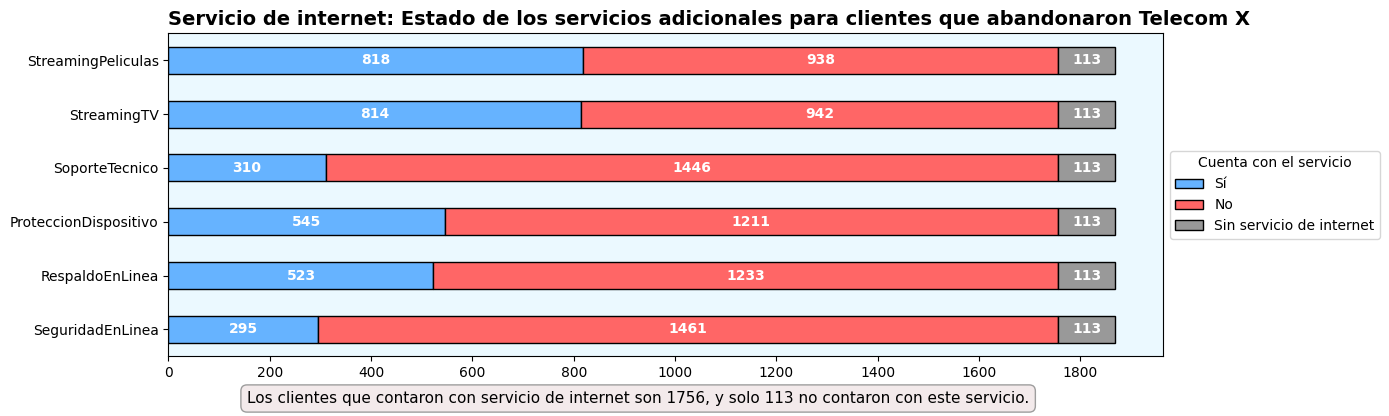

In [88]:
distribucion_evasion_servicios_adicionales().show()

In [89]:
def distribucion_permanecen_servicios_adicionales():

    # Lista de servicios adicionales
    servicios = [
        'SeguridadEnLinea',
        'RespaldoEnLinea',
        'ProteccionDispositivo',
        'SoporteTecnico',
        'StreamingTV',
        'StreamingPeliculas'
    ]

    # Crear DataFrame para clasificar por tipo de respuesta
    conteo_servicios = pd.DataFrame(columns=['Sí', 'No', 'Sin servicio de internet'], index=servicios)

    # Contar valores en cada categoría
    for col in servicios:
        conteo = df_no_evasion[col].value_counts()
        conteo_servicios.loc[col] = [
            conteo.get('Sí', 0),
            conteo.get('No', 0),
            conteo.get('Sin servicio de internet', 0)
        ]

    # Convertir a enteros
    conteo_servicios = conteo_servicios.astype(int)

    # Diccionario de colores por categoría
    colores = {
        'Sí': color_si,
        'No': color_no,
        'Sin servicio de internet': color_nulo_1
    }

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(14, 4))

    # Gráfico de barras horizontales apiladas
    conteo_servicios.plot(
        kind='barh',
        stacked=True,
        color=[colores[col] for col in conteo_servicios.columns],
        edgecolor='black',
        ax=ax
    )

    # Estética
    ax.set_facecolor(color_interior)
    ax.set_title('Servicio de internet: Estado de los servicios adicionales para clientes que permanecen en Telecom X', fontsize=14, fontweight='bold', loc='left')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.xaxis.set_major_locator(plt.MultipleLocator(500))

    # Etiquetas centradas dentro de cada bloque
    for i, servicio in enumerate(conteo_servicios.index):
        acumulado = 0
        for estado in conteo_servicios.columns:
            valor = conteo_servicios.loc[servicio, estado]
            if valor > 0:
                ax.text(
                    acumulado + valor / 2, i,
                    str(valor),
                    ha='center', va='center',
                    fontsize=10, color='white', fontweight='bold'
                )
                acumulado += valor

    # Cálculo para texto adicional
    total_con_internet_ne = ((df_no_evasion['ServicioInternet'] == 'DSL') | (df_no_evasion['ServicioInternet'] == 'Fibra óptica')).sum()
    total_sin_internet_ne = (df_no_evasion['ServicioInternet'] == 'No').sum()
    texto = (
        f"Los clientes que cuentan con servicio de internet son {total_con_internet_ne}, "
        f"y un total de {total_sin_internet_ne} no cuentan con este servicio.\n"
        f"La proporción de clientes que cuenta o no con servicios adicionales se mantiene bastante similar para ambos casos."
    )

    # Insertar texto explicativo
    fig.text(
        0.16, 0.01,
        texto,
        fontsize=11,
        color='black',
        ha='left',
        va='top',
        bbox=dict(
            boxstyle='round,pad=0.4',
            edgecolor=color_borde,
            facecolor=color_fondo,
            alpha=0.95
        )
    )

    # Leyenda y ajustes
    ax.legend(title='Cuenta con el servicio', loc='center left', bbox_to_anchor=(1, 0.5))
    plt.tight_layout()
    return plt


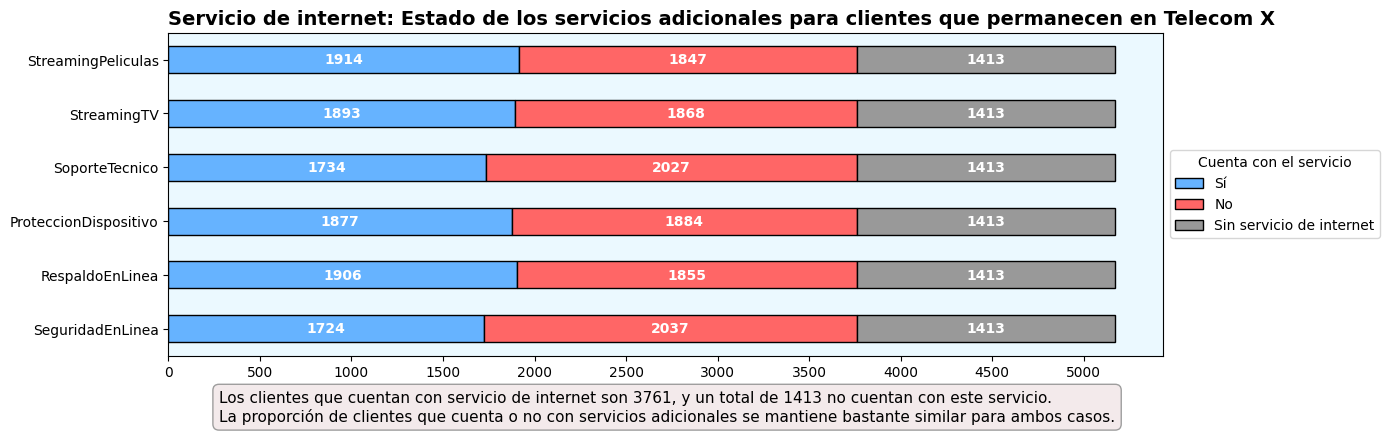

In [90]:
distribucion_permanecen_servicios_adicionales().show()

#### **7. Métodos de pago y cobros**

In [91]:
def proporcion_evasion_metodo_pago():

    # Contar la cantidad de usuarios que permanecen o abandonan Telecom X
    evasion_metodo_pago = df_evasion['MetodoPago'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = [
        'Cheque por correo',
        'Cheque electrónico',
        'Tarjeta de crédito (automático)',
        'Transferencia bancaria (automática)'
    ]

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(9, 9))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        evasion_metodo_pago,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=100,
        colors=[color_1, color_2, color_6, color_4],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        explode=(0.02,0.02,0.02,0.02),
        textprops= {'fontsize': 14, 'color':'black'},
        labeldistance=1.1,
    )


    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(14)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Proporción de clientes que abandonaron vs Método de Pago', fontsize=14, fontweight='bold', loc='left')
    #ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

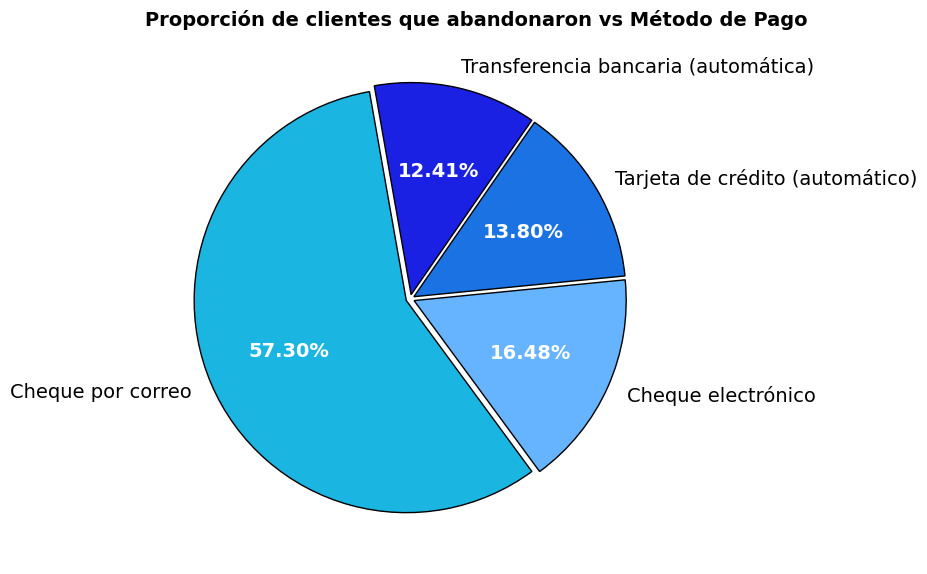

In [92]:
proporcion_evasion_metodo_pago().show()

In [93]:
def proporcion_permanecen_metodo_pago():

    # Contar la cantidad de usuarios que permanecen o abandonan Telecom X
    no_evasion_metodo_pago = df_no_evasion['MetodoPago'].value_counts()

    # Crear etiquetas para el gráfico
    etiquetas = [
        'Cheque por correo',
        'Cheque electrónico',
        'Tarjeta de crédito (automático)',
        'Transferencia bancaria (automática)'
    ]

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(9, 9))

    # Crear el gráfico de torta
    # Guardamos los textos generados para poder modificarlos
    wedges, texts, autotexts = ax.pie(
        no_evasion_metodo_pago,
        labels=etiquetas,
        autopct='%1.2f%%',
        startangle=115,
        colors=[color_1, color_2, color_6, color_4],
        wedgeprops={'edgecolor': 'black', 'linewidth': 1},
        explode=(0.02,0.02,0.02,0.02),
        textprops= {'fontsize': 14, 'color':'black'}
    )

    # Personalizar solo los porcentajes (textos internos)
    for autotext in autotexts:
        autotext.set_color('white')     # Color del texto dentro del gráfico
        autotext.set_fontsize(14)       # Tamaño de los porcentajes
        autotext.set_fontweight('bold') # Colocar en negrita

    # Ajustes de presentación
    ax.set_title('Proporción de clientes que permanecen vs Método de Pago', fontsize=14, fontweight='bold', loc='left')
    #ax.axis('equal')  # Asegura que el gráfico sea perfectamente circular

    # Mostrar
    plt.tight_layout()
    return plt

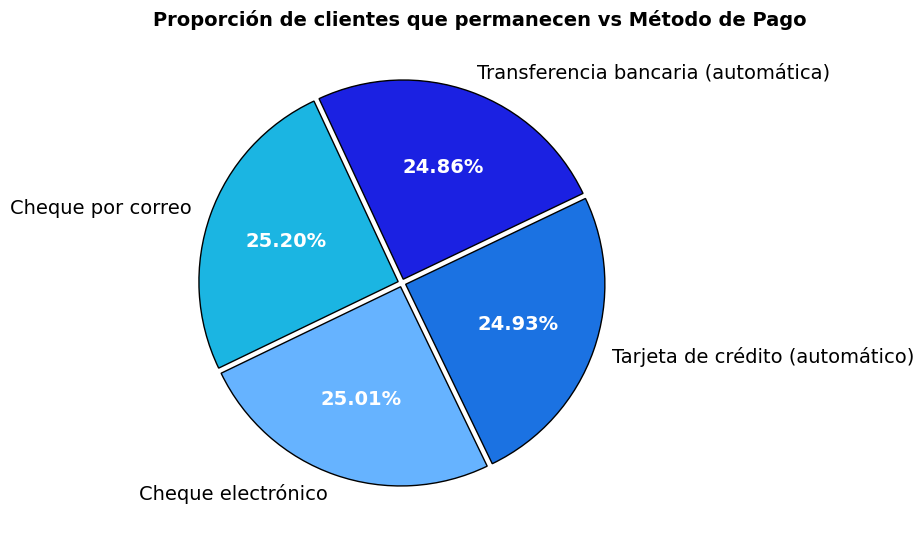

In [94]:
proporcion_permanecen_metodo_pago().show()

In [95]:
def comparativa_metodo_pago():

    # Contar clientes por método de pago para ambos grupos
    evasion_pago = df_evasion['MetodoPago'].value_counts()
    no_evasion_pago = df_no_evasion['MetodoPago'].value_counts()

    # Métodos de pago a mostrar (ordenados manualmente)
    metodos_pago = [
        'Cheque por correo',
        'Cheque electrónico',
        'Tarjeta de crédito (automático)',
        'Transferencia bancaria (automática)'
    ]

    # Crear DataFrame comparativo
    comparativa_pago = pd.DataFrame({
        'Abandonaron': [evasion_pago.get(m, 0) for m in metodos_pago],
        'Permanecen': [no_evasion_pago.get(m, 0) for m in metodos_pago]
    }, index=metodos_pago)

    # Crear figura y ejes
    fig, ax = plt.subplots(figsize=(12, 5))

    # Gráfico de barras apiladas
    comparativa_pago.plot(
        kind='bar',
        stacked=True,
        color=[color_no, color_si],
        edgecolor='black',
        ax=ax
    )

    # Color de fondo
    ax.set_facecolor(color_interior)

    # Agregar etiquetas numéricas a las barras
    for i, metodo in enumerate(metodos_pago):
        val_aband = comparativa_pago.loc[metodo, 'Abandonaron']
        val_perm = comparativa_pago.loc[metodo, 'Permanecen']

        if val_aband > 0:
            ax.text(i, val_aband / 2, str(val_aband), ha='center', va='center',
                    fontsize=10, fontweight='bold', color='white')

        if val_perm > 0:
            ax.text(i, val_aband + (val_perm - 5), str(val_perm), ha='center', va='bottom',
                    fontsize=10, fontweight='bold', color='black')

    # Estética
    ax.set_title('Comparativa de clientes por Método de Pago', fontsize=14, fontweight='bold', loc='left')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_xlabel('')
    ax.set_ylim(0, 2600)
    ax.yaxis.set_major_locator(plt.MultipleLocator(250))
    plt.xticks(rotation=0)
    ax.legend(title='Estado del cliente', loc='upper right')

    # Ajuste final
    plt.tight_layout()
    return plt

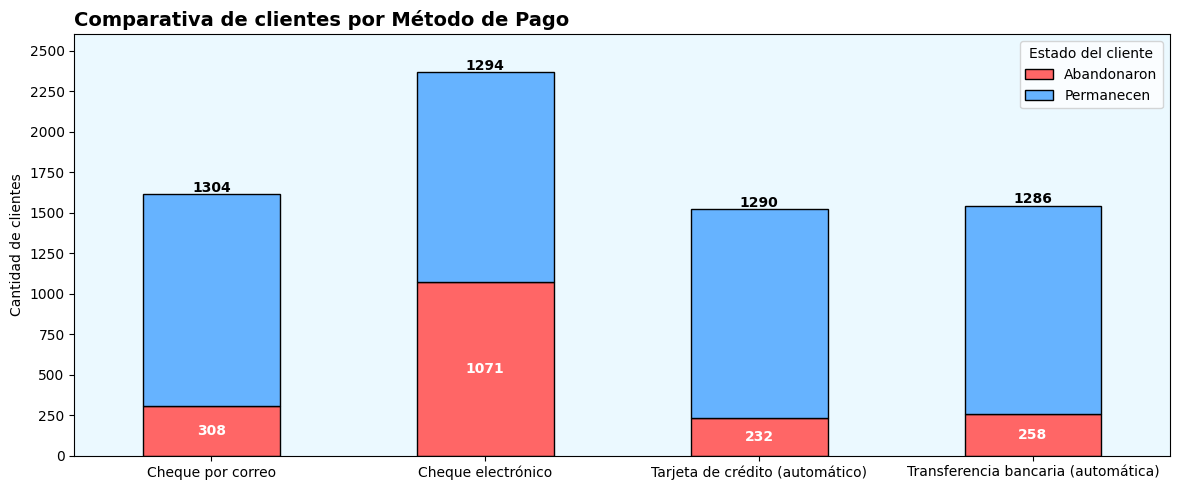

In [96]:
comparativa_metodo_pago().show()

In [97]:
def boxplot_pagos():

    # Crear la figura con dos subgráficos
    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # Definir orden deseado: Primero 'No' (Permanece), luego 'Sí' (Abandona)
    orden_etiquetas = ['No', 'Sí']

    # Primer gráfico: Cargo Mensual
    sns.boxplot(
        data=df,
        x='Evasion',
        y='CargoMensual',
        hue='Evasion',
        order=orden_etiquetas,
        hue_order=orden_etiquetas,
        legend=False,
        palette={'Sí': color_no, 'No': color_si},
        boxprops=dict(edgecolor='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markeredgecolor='black'),
        ax=axes[0]
    )
    axes[0].set_title('Distribución del Cargo Mensual', fontsize=14, fontweight='bold', loc='left')
    axes[0].set_xlabel('')
    axes[0].set_ylabel('Cargo Mensual (USD)')
    axes[0].set_facecolor(color_interior)
    axes[0].set_xticks([0, 1])
    axes[0].set_xticklabels(['Permanece', 'Abandona'])

    # Segundo gráfico: Cargo Total
    sns.boxplot(
        data=df,
        x='Evasion',
        y='CargoTotal',
        hue='Evasion',
        order=orden_etiquetas,
        hue_order=orden_etiquetas,
        legend=False,
        palette={'Sí': color_no, 'No': color_si},
        boxprops=dict(edgecolor='black'),
        medianprops=dict(color='black'),
        whiskerprops=dict(color='black'),
        capprops=dict(color='black'),
        flierprops=dict(markeredgecolor='black'),
        ax=axes[1]
    )
    axes[1].set_title('Distribución del Cargo Total', fontsize=14, fontweight='bold', loc='left')
    axes[1].set_xlabel('')
    axes[1].set_ylabel('Cargo Total (USD)')
    axes[1].set_facecolor(color_interior)
    axes[1].set_xticks([0, 1])
    axes[1].set_xticklabels(['Permanece', 'Abandona'])

    # Estética general
    fig.suptitle('Comparación de Pagos entre Clientes que Abandonaron y Permanecen en Telecom X', fontsize=15, fontweight='bold')
    plt.tight_layout()
    return plt

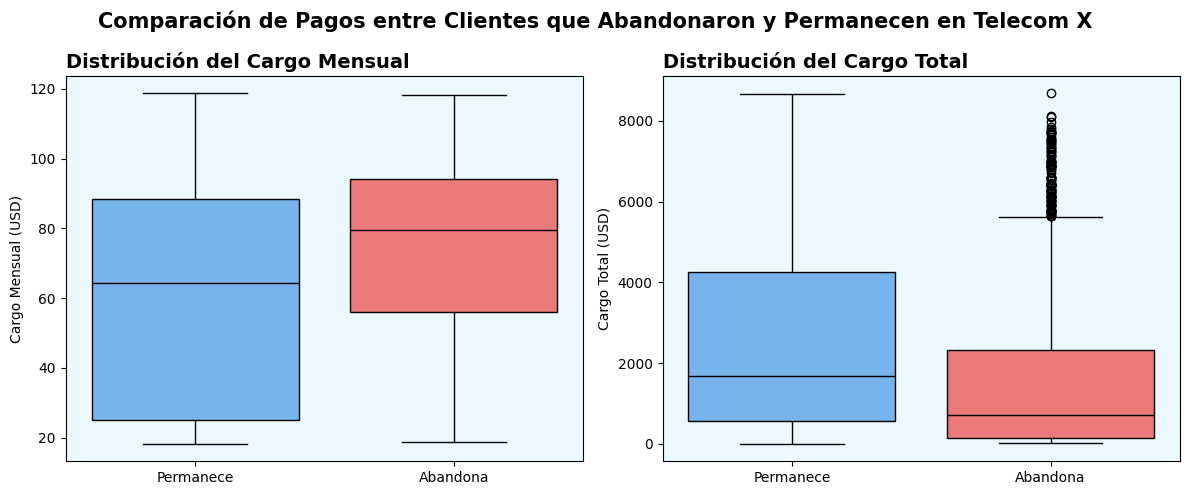

In [98]:
boxplot_pagos().show()

In [99]:
# Para comprobar el orden del gráfico anterior:
print(df['Evasion'].unique())

['No' 'Sí']


In [100]:
def distribucion_evasion_cuentas_diarias():

    # Distribución de cuentas diaras para clientes que abandonaron
    fig, ax = plt.subplots(figsize=(12, 4))

    # Histograma con estilo personalizado
    sns.histplot(
        data=df[df['Evasion'] == 'Sí'],
        x='CuentasDiarias',
        bins=30,
        color = color_no,
        edgecolor='black',
        ax=ax
    )

    # Estética
    ax.set_title('Distribución de Cuentas Diarias de clientes que abandonaron', fontsize=13, fontweight='bold', loc='left')
    ax.set_xlabel('Cuentas Diarias (USD)')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)


    plt.tight_layout()
    return plt

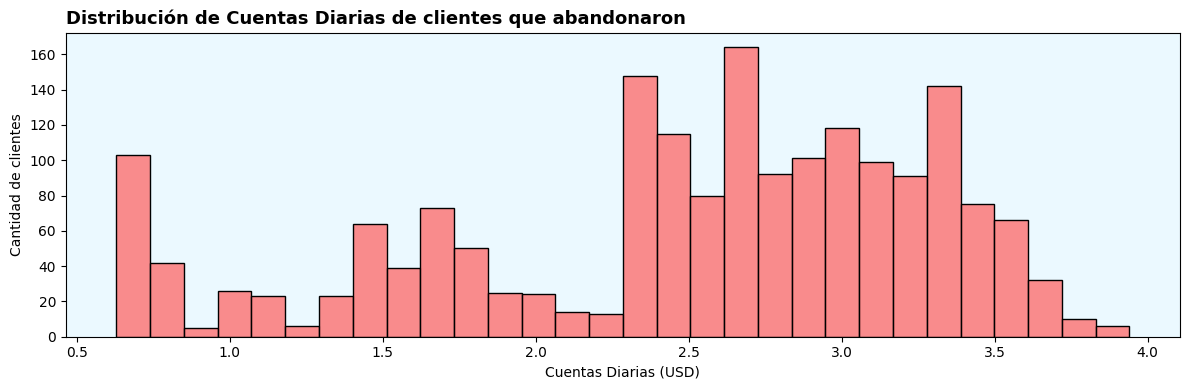

In [101]:
distribucion_evasion_cuentas_diarias().show()

In [102]:
def distribucion_permanecen_cuentas_diarias():

    # Distribución de cuentas diarias para clientes que permanecen
    fig, ax = plt.subplots(figsize=(12, 4))

    # Histograma con estilo personalizado
    sns.histplot(
        data=df[df['Evasion'] == 'No'],
        x='CuentasDiarias',
        bins=30,
        color = color_si,
        edgecolor='black',
        ax=ax
    )

    # Estética
    ax.set_title('Distribución de Cuentas Diarias de clientes que permanecen', fontsize=13, fontweight='bold', loc='left')
    ax.set_xlabel('Cuentas Diarias (USD)')
    ax.set_ylabel('Cantidad de clientes')
    ax.set_facecolor(color_interior)

    plt.tight_layout()
    return plt

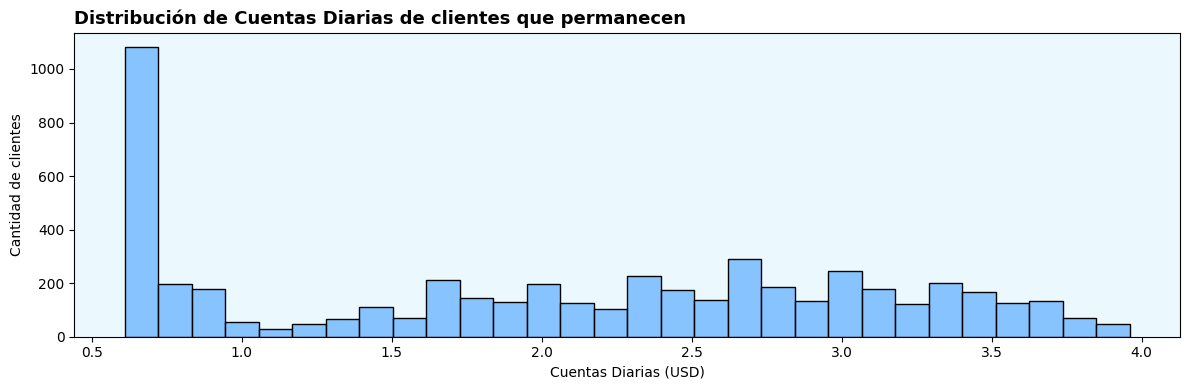

In [103]:
distribucion_permanecen_cuentas_diarias().show()

In [104]:
df.head()

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.6,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.9,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.9,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.0,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.9,267.40


## **Exportar gráficos**

In [105]:
# Función genérica para exportar gráficos como imagen
def exportar_grafico(funcion_grafico, nombre):
    imagen = funcion_grafico()
    imagen.savefig(f'{nombre}.png', bbox_inches='tight')
    imagen.close()

# Exportación de todos los gráficos usando la función anterior
# 1. Evasión
exportar_grafico(proporcion_evasion, 'grafico_proporcion_evasion')
exportar_grafico(distribucion_evasion,'grafico_distribucion_evasion')

# 2. Antigüedad
exportar_grafico(boxplot_antiguedad, 'grafico_boxplot_antiguedad')
exportar_grafico(distribucion_antiguedad, 'grafico_distribucion_antiguedad')
exportar_grafico(distribucion_evasion_antiguedad, 'grafico_distribucion_evasion_antiguedad')

# 3. Género
exportar_grafico(proporcion_evasion_genero, 'grafico_proporcion_evasion_genero')

# 4. Adultos Mayores
exportar_grafico(proporcion_evasion_a_mayor, 'grafico_proporcion_evasion_a_mayor')
exportar_grafico(boxplot_permanecen_antiguedad_a_mayor, 'grafico_boxplot_permanecen_antiguedad_a_mayor')
exportar_grafico(distribucion_permanecen_antiguedad_a_mayor, 'grafico_distribucion_permanecen_antiguedad_a_mayor')
exportar_grafico(boxplot_evasion_antiguedad_a_mayor, 'grafico_boxplot_evasion_antiguedad_a_mayor')
exportar_grafico(distribucion_evasion_antiguedad_a_mayor, 'grafico_distribucion_evasion_antiguedad_a_mayor')

# 5. Parejas / Dependientes
exportar_grafico(proporcion_evasion_parejas, 'grafico_proporcion_evasion_parejas')
exportar_grafico(distribucion_parejas, 'grafico_distribucion_parejas')
exportar_grafico(proporcion_evasion_dependientes, 'grafico_proporcion_evasion_dependientes')

# 6. Tipo de contrato o servicio
exportar_grafico(distribucion_evasion_antiguedad_contrato, 'grafico_distribucion_evasion_antiguedad_contrato')
exportar_grafico(distribucion_servicios, 'grafico_distribucion_servicios')
exportar_grafico(distribucion_con_dependientes, 'grafico_distribucion_con_dependientes')
exportar_grafico(distribucion_sin_dependientes, 'grafico_distribucion_sin_dependientes')
exportar_grafico(distribucion_evasion_antiguedad_con_dependientes, 'grafico_distribucion_evasion_antiguedad_con_dependientes')
exportar_grafico(distribucion_telefonia, 'grafico_distribucion_telefonia')
exportar_grafico(distribucion_internet, 'grafico_distribucion_internet')
exportar_grafico(proporcion_evasion_internet, 'grafico_proporcion_evasion_internet')
exportar_grafico(distribucion_evasion_servicios_adicionales, 'grafico_distribucion_evasion_servicios_adicionales')
exportar_grafico(distribucion_permanecen_servicios_adicionales, 'grafico_distribucion_permanecen_servicios_adicionales')

# 7. Tipos de pago
exportar_grafico(proporcion_evasion_metodo_pago, 'grafico_proporcion_evasion_metodo_pago')
exportar_grafico(proporcion_permanecen_metodo_pago, 'grafico_proporcion_permanecen_metodo_pago')
exportar_grafico(comparativa_metodo_pago, 'grafico_comparativa_metodo_pago')
exportar_grafico(boxplot_pagos, 'grafico_boxplot_pagos')
exportar_grafico(distribucion_evasion_cuentas_diarias, 'grafico_distribucion_evasion_cuentas_diarias')
exportar_grafico(distribucion_permanecen_cuentas_diarias, 'grafico_distribucion_permanecen_cuentas_diarias')



## **Funciones para visualización de gráficos**

### **1. Evasión General**

In [113]:
def mostrar_graficos_evasion():

    print('1. Proporción de Evasión de Clientes en Telecom X:')
    proporcion_evasion().show()
    print('\n\n2. Cantidad de clientes que permanecen y abandonan Telecom X:')
    distribucion_evasion().show()

### **2. Antigüedad del cliente**

In [116]:
def mostrar_graficos_antiguedad():

    print('1. Antigüedad de clientes: Permanecen vs. Abandonaron')
    boxplot_antiguedad().show()

    print('\n\n2. Distribución de Antigüedad por Estado del Cliente')
    distribucion_antiguedad().show()

    print('\n\n3. Distribución de Abandono de clientes por Mes de Antigüedad')
    distribucion_evasion_antiguedad().show()

### **3. Género**

In [119]:
def mostrar_graficos_genero():

    print('1. Evasión de clientes: ¿Cuál es su género?')
    proporcion_evasion_genero().show()

### **4. Adultos Mayores**

In [121]:
def mostrar_graficos_adultos_mayores():

    print('1. Evasión de clientes: ¿Adultos Mayores abandonan menos?')
    proporcion_evasion_a_mayor().show()

    print('\n\n2. Antigüedad de clientes que permanecen: Adultos Mayores vs Otros')
    boxplot_permanecen_antiguedad_a_mayor().show()

    print('\n\n3. Distribución de Antigüedad en clientes que permanecen en Telecom X: Adultos Mayores vs otros clientes')
    distribucion_permanecen_antiguedad_a_mayor().show()

    print('\n\n4. Antigüedad de clientes que abandonaron: Adultos Mayores vs. Otros')
    boxplot_evasion_antiguedad_a_mayor().show()

    print('\n\n5. Distribución de Antigüedad en clientes que abandonaron Telecom X: Adultos Mayores vs otros clientes')
    distribucion_evasion_antiguedad_a_mayor().show()

### **5. Parejas y dependientes**

In [123]:
def mostrar_graficos_parejas_dependientes():

    print('1. Evasión de clientes: ¿Tienen Pareja?')
    proporcion_evasion_parejas().show()

    print('\n\n2. Comparativa de clientes con o sin pareja')
    distribucion_parejas().show()

    print('\n\n3. Evasión de clientes: Sin dependientes abandonan más')
    proporcion_evasion_dependientes().show()

### **6. Tipo de contrato y servicios**

In [125]:
def mostrar_graficos_contrato_servicios():

    print('1. Distribución de evasión por rango de antigüedad y tipo de contrato')
    distribucion_evasion_antiguedad_contrato().show()

    print('\n\n2. Comparativa de clientes según combinación de servicios contratados')
    distribucion_servicios().show()

    print('\n\n3. Distribución de evasión por rango de antigüedad y tipo de servicio: Clientes con dependientes')
    distribucion_con_dependientes().show()

    print('\n\n4. Distribución de evasión por rango de antigüedad y tipo de servicio: Clientes sin dependientes')
    distribucion_sin_dependientes().show()

    print('\n\n5. Distribución de evasión por rango de antigüedad y tipo de servicio: Comparativa con dependientes (visualización ampliada)')
    distribucion_evasion_antiguedad_con_dependientes().show()

    print('\n\n6. Distribución de evasión y permanencia según cantidad de líneas telefónicas')
    distribucion_telefonia().show()

    print('\n\n7. Distribución de evasión y permanencia según tipo de servicio de Internet')
    distribucion_internet().show()

    print('\n\n8. Proporción de clientes que abandonaron vs Servicio de internet (gráfico de rosca)')
    proporcion_evasion_internet().show()

    print('\n\n9. Servicios adicionales contratados por clientes que abandonaron: estado por tipo de internet')
    distribucion_evasion_servicios_adicionales().show()

    print('\n\n10. Servicios adicionales contratados por clientes que permanecen: estado por tipo de internet')
    distribucion_permanecen_servicios_adicionales().show()

### **7. Métodos de pago y cobros**

In [127]:
def mostrar_graficos_metodos_pago_cobros():

    print("1. Proporción de clientes que abandonaron vs Método de Pago")
    proporcion_evasion_metodo_pago().show()

    print("\n\n2. Proporción de clientes que permanecen vs Método de Pago")
    proporcion_permanecen_metodo_pago().show()

    print("\n\n3. Comparativa de clientes por Método de Pago (Evasión vs Permanencia)")
    comparativa_metodo_pago().show()

    print("\n\n4. Comparación de Cargos (Mensual y Total) entre clientes que abandonaron y permanecen")
    boxplot_pagos().show()

    print("\n\n5. Distribución de Cuentas Diarias de clientes que abandonaron")
    distribucion_evasion_cuentas_diarias().show()

    print("\n\n6. Distribución de Cuentas Diarias de clientes que permanecen")
    distribucion_permanecen_cuentas_diarias().show()

## **Informe Final**

### **Introducción**

**Introducción del Proyecto**

El presente análisis se enfoca en el estudio del comportamiento de los clientes de la empresa ficticia **Telecom X**, con el objetivo principal de **identificar patrones asociados a la evasión** (`churn`) de sus servicios. A través de un enfoque visual y analítico, se busca comprender qué variables influyen en la decisión de un cliente de abandonar o mantenerse en la compañía.

**Limpieza y preparación de los datos**

* Se tradujeron los nombres de las columnas y los valores internos al español, promoviendo una lectura más comprensible.

* Se revisaron las columnas binarias (`Partner`, `Dependents`, `PhoneService`, `PaperlessBilling`) y se optó por mantener sus valores como 'Sí' y 'No' en lugar de convertirlos a booleanos, priorizando la legibilidad.

* La columna `SeniorCitizen`, que contenía valores `0` y `1`, fue convertida a texto (`'No'` / `'Sí'`) para mantener la coherencia con el resto de variables binarias.

* Se identificaron **224 registros sin valor definido en la columna** `Churn`, los cuales fueron eliminados para evitar ambigüedades en los resultados.

* La columna `Charges.Total`, originalmente de tipo texto (`object`), fue convertida a tipo numérico (`float64`) tras reemplazar los valores vacíos por `0.0`, en los casos en que el cliente aún no acumulaba cargos.

* El dataset original, de carácter público y en idioma inglés, fue sometido a un proceso de transformación y depuración para facilitar su análisis.

* Se creó una nueva columna llamada `CuentasDiarias`, derivada de las condiciones de contrato y facturación, para identificar clientes con un patrón de pago diario.

Finalmente, se realizó un reinicio del índice para mantener un orden limpio y coherente en el DataFrame final.

**Dataframe**

In [140]:
df.head(10)

,ID_Cliente,Evasion,Genero,AdultoMayor,TienePareja,Dependientes,MesesAntiguedad,ServicioTelefonico,LineasMultiples,ServicioInternet,...,ProteccionDispositivo,SoporteTecnico,StreamingTV,StreamingPeliculas,TipoContrato,FacturaElectronica,MetodoPago,CuentasDiarias,CargoMensual,CargoTotal
0,0002-ORFBO,No,Femenino,No,Sí,Sí,9,Sí,No,DSL,...,No,Sí,Sí,No,Un año,Sí,Cheque por correo,2.19,65.60,593.30
1,0003-MKNFE,No,Masculino,No,No,No,9,Sí,Sí,DSL,...,No,No,No,Sí,Mensual,No,Cheque por correo,2.00,59.90,542.40
2,0004-TLHLJ,Sí,Masculino,No,No,No,4,Sí,No,Fibra óptica,...,Sí,No,No,No,Mensual,Sí,Cheque electrónico,2.46,73.90,280.85
3,0011-IGKFF,Sí,Masculino,Sí,Sí,No,13,Sí,No,Fibra óptica,...,Sí,No,Sí,Sí,Mensual,Sí,Cheque electrónico,3.27,98.00,1237.85
4,0013-EXCHZ,Sí,Femenino,Sí,Sí,No,3,Sí,No,Fibra óptica,...,No,Sí,Sí,No,Mensual,Sí,Cheque por correo,2.80,83.90,267.40
5,0013-MHZWF,No,Femenino,No,No,Sí,9,Sí,No,DSL,...,No,Sí,Sí,Sí,Mensual,Sí,Tarjeta de crédito (automático),2.31,69.40,571.45
6,0013-SMEOE,No,Femenino,Sí,Sí,No,71,Sí,No,Fibra óptica,...,Sí,Sí,Sí,Sí,Dos años,Sí,Transferencia bancaria (automática),3.66,109.70,7904.25
7,0014-BMAQU,No,Masculino,No,Sí,No,63,Sí,Sí,Fibra óptica,...,No,Sí,No,No,Dos años,Sí,Tarjeta de crédito (automático),2.82,84.65,5377.80
8,0015-UOCOJ,No,Femenino,Sí,No,No,7,Sí,No,DSL,...,No,No,No,No,Mensual,Sí,Cheque electrónico,1.61,48.20,340.35
9,0016-QLJIS,No,Femenino,No,Sí,Sí,65,Sí,Sí,DSL,...,Sí,Sí,Sí,Sí,Dos años,Sí,Cheque por correo,3.02,90.45,5957.90


**Columnas**

In [132]:
df.columns

Index(['ID_Cliente', 'Evasion', 'Genero', 'AdultoMayor', 'TienePareja',
       'Dependientes', 'MesesAntiguedad', 'ServicioTelefonico',
       'LineasMultiples', 'ServicioInternet', 'SeguridadEnLinea',
       'RespaldoEnLinea', 'ProteccionDispositivo', 'SoporteTecnico',
       'StreamingTV', 'StreamingPeliculas', 'TipoContrato',
       'FacturaElectronica', 'MetodoPago', 'CuentasDiarias', 'CargoMensual',
       'CargoTotal'],
      dtype='object')

**Enfoque del análisis**

El análisis visual se realiza utilizando la biblioteca **Matplotlib**, con funciones gráficas personalizadas que mantienen un estilo homogéneo. Cada gráfico fue construido en funciones independientes con `return plt`, y preparado para ser exportado mediante la función `exportar_grafico(...)`.

El análisis se divide en siete grupos temáticos, según la naturaleza de las variables:

1. Evasión general

2. Antigüedad del cliente

3. Género

4. Adultos mayores

5. Parejas y dependientes

6. Tipo de contrato y servicios

7. Métodos de pago y cobros

Cada grupo será analizado visualmente y acompañado de un breve resumen explicativo que responde a tres preguntas clave:

1. ¿Qué se visualiza?

2. ¿Qué se identificó?

3. ¿Qué se puede hacer?

Al finalizar, se entregará una conclusión general, basada en los hallazgos más relevantes del conjunto de gráficos, con el objetivo de informar decisiones estratégicas que puedan mejorar la retención de clientes en Telecom X.

### **Análisis**

#### **1. Evasión General**

1. Proporción de Evasión de Clientes en Telecom X:


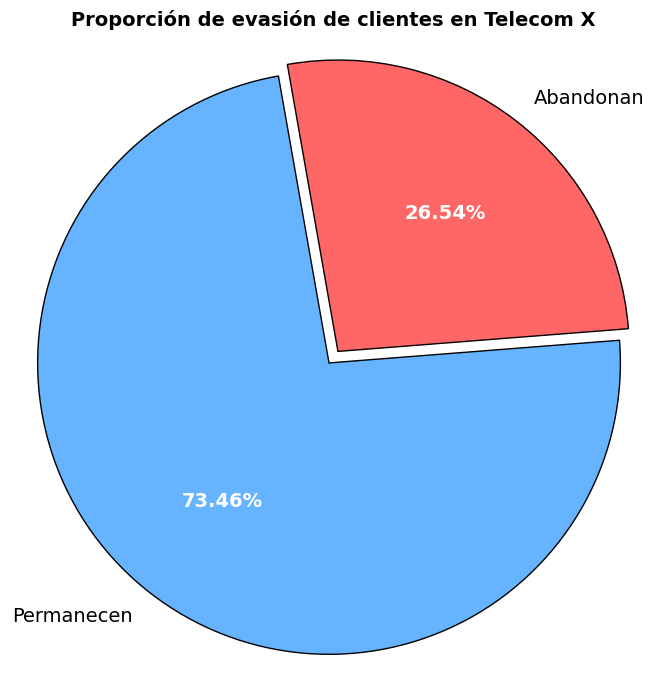



2. Cantidad de clientes que permanecen y abandonan Telecom X:


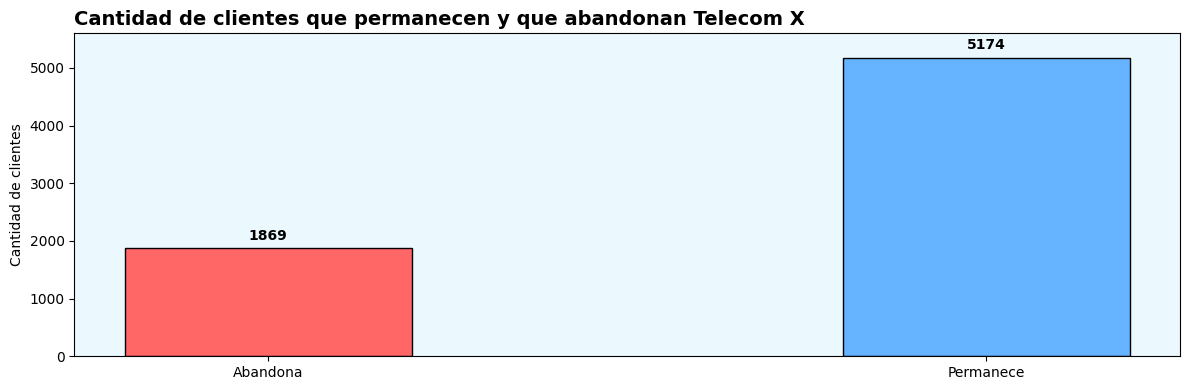

In [114]:
# Llama a la función para mostrar los gráficos
mostrar_graficos_evasion()

**¿Qué se visualizó?**

Se presentan dos gráficos complementarios que permiten tener una primera aproximación al problema de evasión en Telecom X:

>* **El gráfico de torta** muestra la proporción relativa de clientes que han abandonado **(26.54%)** frente a los que permanecen **(73.46%)**.
>
>* **El gráfico de barras** compara las cantidades absolutas de cada grupo: 1869 clientes han abandonado, mientras que **5174** permanecen en la empresa.


**¿Qué se identificó?**

>* La tasa de evasión alcanza un **26.5%**, lo cual representa un desafío importante para la retención de clientes.
>
>* Aunque la mayoría de los clientes siguen activos, más de una cuarta parte de la base de clientes ha abandonado, lo que evidencia una oportunidad de mejora significativa.
>
>* Este dato global servirá como línea base para comparar la evasión segmentada por otras variables (edad, servicios, método de pago, etc.).

**¿Qué se puede hacer?**
>
>* Usar esta proporción como referencia constante durante el análisis por categorías: cualquier subgrupo con evasión por sobre el **26.5%** requerirá atención especial.
>
>* Establecer esta métrica como indicador clave para futuras estrategias de retención.
>
>* Implementar un sistema de seguimiento continuo de la evasión global, idealmente comparándolo con segmentos específicos mes a mes.

#### **2. Antigüedad del cliente**

1. Antigüedad de clientes: Permanecen vs. Abandonaron


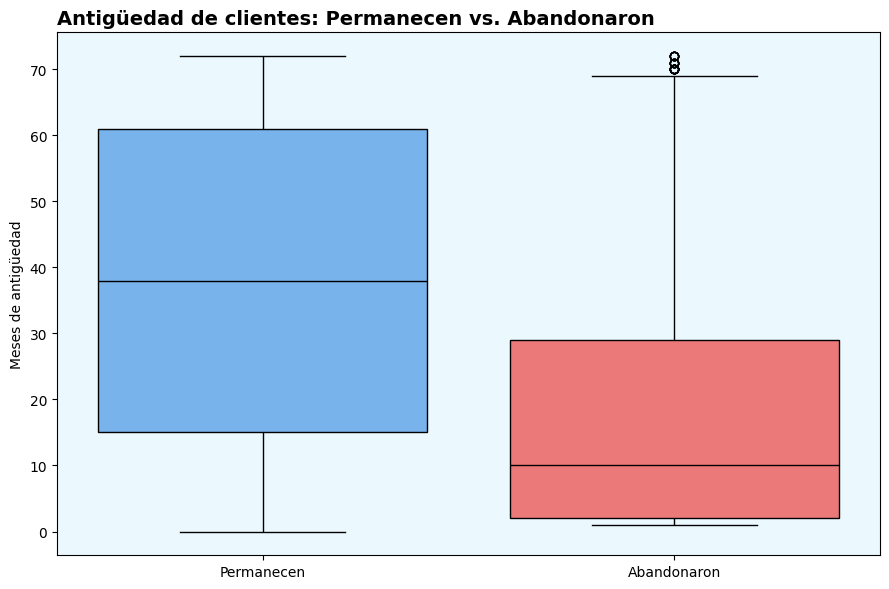



2. Distribución de Antigüedad por Estado del Cliente


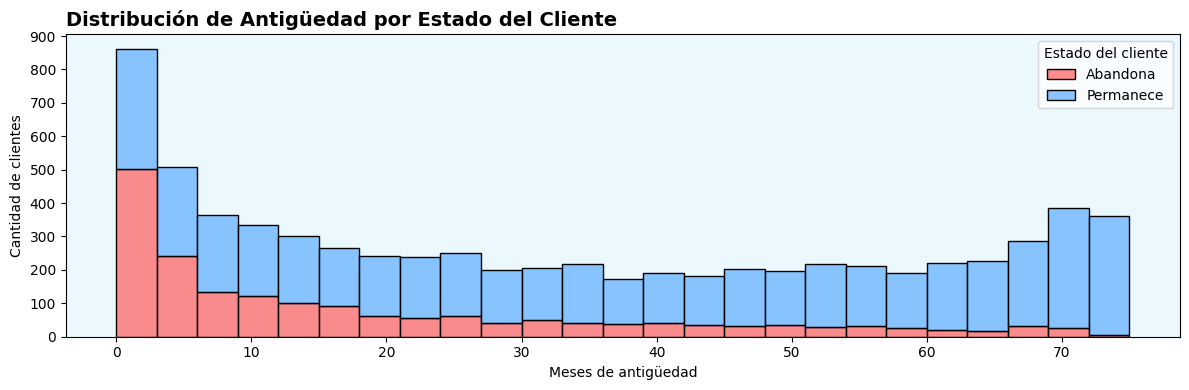



3. Distribución de Abandono de clientes por Mes de Antigüedad


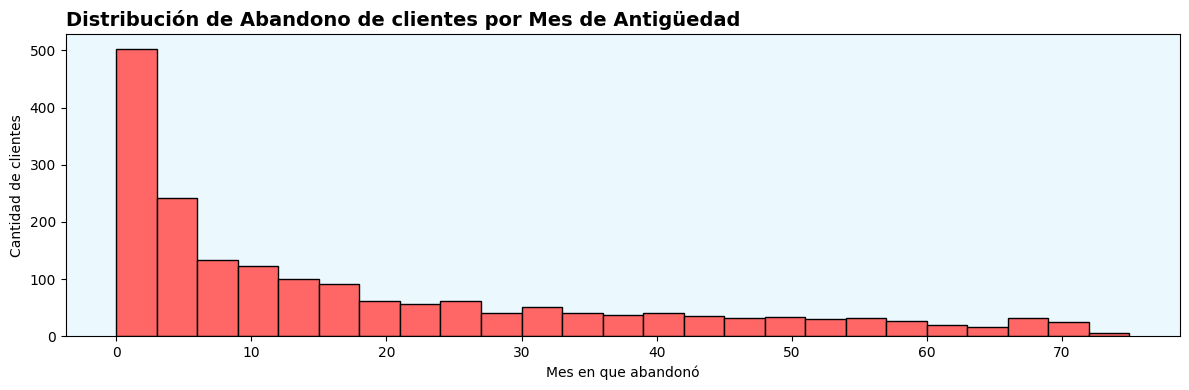

In [118]:
# Llama a la función para mostrar los gráficos
mostrar_graficos_antiguedad()

**¿Qué se visualizó?**

Se presentan tres gráficos enfocados en el análisis de la variable **"Meses de antigüedad"**:

>* **El gráfico de cajas** compara la distribución de antigüedad entre los clientes que permanecen y los que abandonaron el servicio.
>
>* **El histograma apilado** muestra cómo se distribuyen ambos grupos según la cantidad de meses que han permanecido como clientes.
>
>* **El último gráfico** analiza únicamente a los clientes que abandonaron, destacando en qué mes de antigüedad se produce el mayor volumen de evasión.

**¿Qué se identificó?**

>* La mayoría de los clientes que abandonan lo hacen durante los **primeros meses del servicio**, con un peak evidente en el rango de **1 a 4 meses**.
>
>* El grupo que permanece tiene una mediana de antigüedad mucho más alta, con un rango más amplio y sostenido en el tiempo.
>
>* La probabilidad de abandono disminuye significativamente a medida que aumenta el tiempo de permanencia.

**¿Qué se puede hacer?**

>* Implementar acciones de retención temprana enfocadas en los **primeros 3 a 6 meses** del cliente en la compañía.
>
>* Diseñar programas de fidelización o contacto proactivo dentro del primer trimestre.
>
>* Evaluar la experiencia inicial de los nuevos clientes para identificar puntos de fuga tempranos (problemas de instalación, atención o facturación).

#### **3. Género**

1. Evasión de clientes: ¿Cuál es su género?


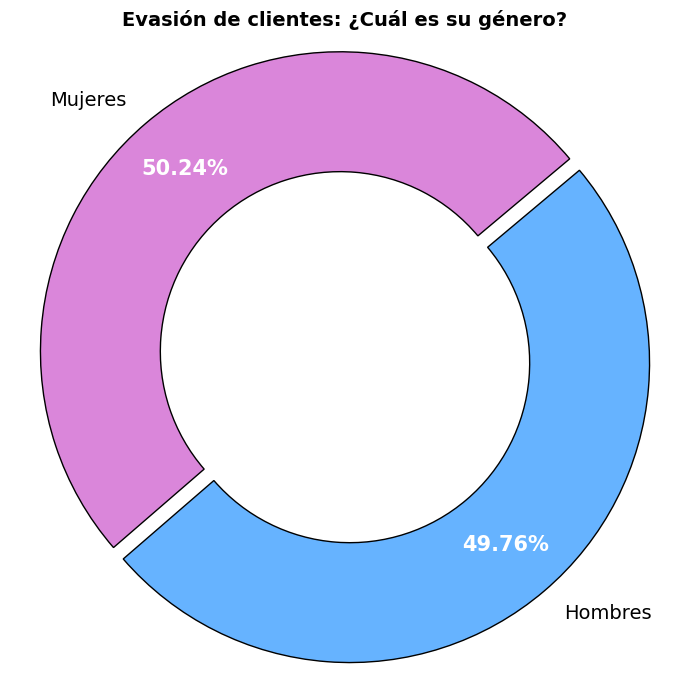

In [120]:
mostrar_graficos_genero()

**¿Qué se visualizó?**

Se presenta un gráfico de rosca que muestra la **proporción de evasión según el género** de los clientes que han abandonado Telecom X:

>* **Las mujeres representan el 50.24%** de quienes abandonaron.
>
>* **Los hombres representan el 49.76%** del total de clientes que evadieron.

**¿Qué se identificó?**

>* La diferencia en evasión entre géneros es **mínima y no significativa**, lo que indica que **el género no parece ser un factor determinante** en la decisión de abandonar la compañía.
>
>* Este equilibrio sugiere que tanto hombres como mujeres presentan **comportamientos de evasión similares** en este contexto.

**¿Qué se puede hacer?**

>* Dado que **no se observan diferencias relevantes por género**, no es necesario implementar estrategias de retención segmentadas en función de esta variable.
>
>* El enfoque debe mantenerse en otras variables con mayor impacto, como la **antigüedad**, el **tipo de contrato** o los **métodos de pago**.

#### **4. Adultos Mayores**

1. Evasión de clientes: ¿Adultos Mayores abandonan menos?


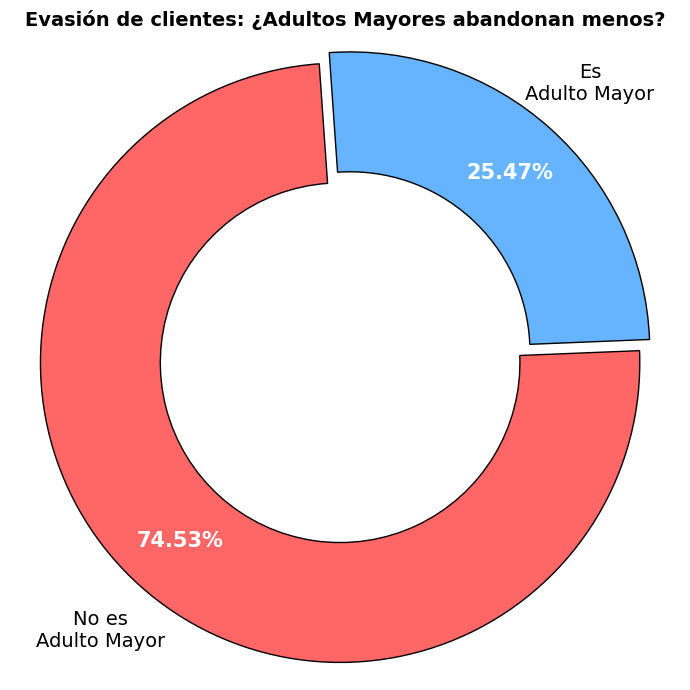



2. Antigüedad de clientes que permanecen: Adultos Mayores vs Otros


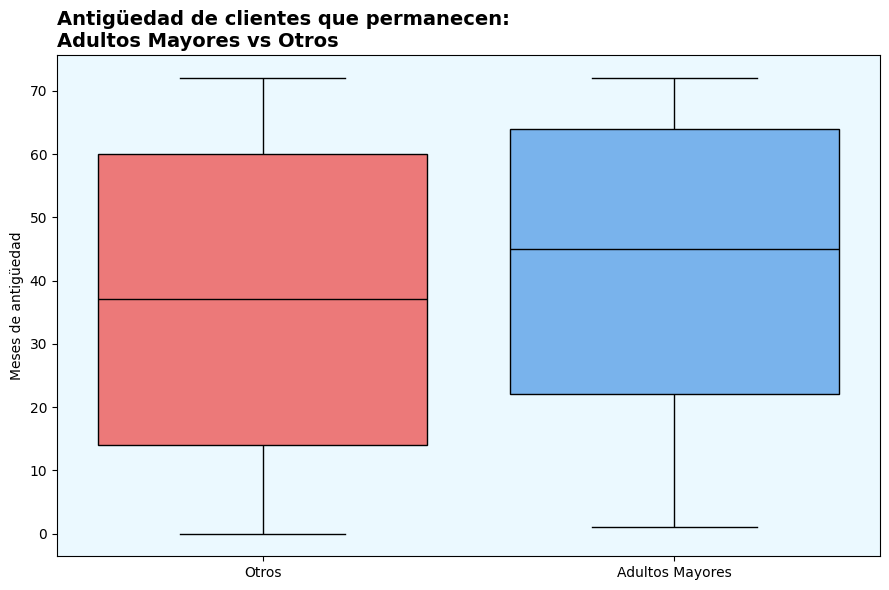



3. Distribución de Antigüedad en clientes que permanecen en Telecom X: Adultos Mayores vs otros clientes


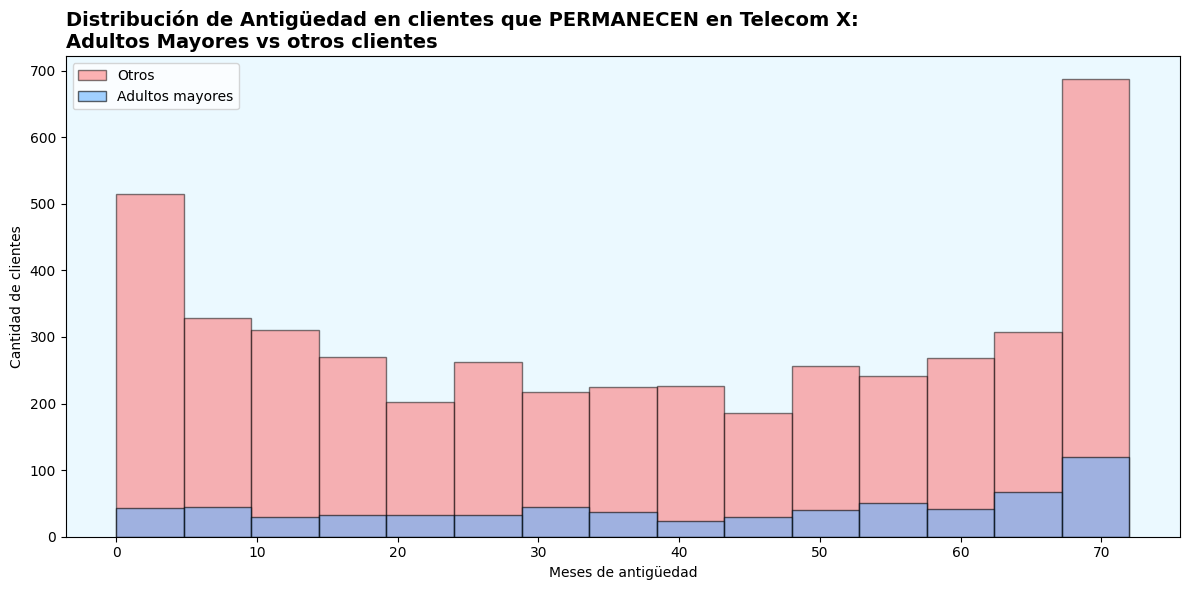



4. Antigüedad de clientes que abandonaron: Adultos Mayores vs. Otros


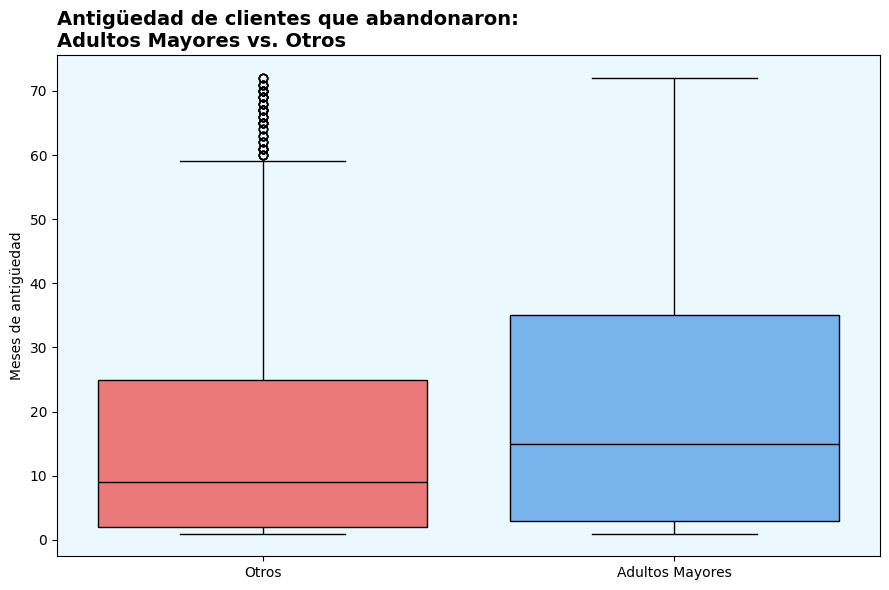



5. Distribución de Antigüedad en clientes que abandonaron Telecom X: Adultos Mayores vs otros clientes


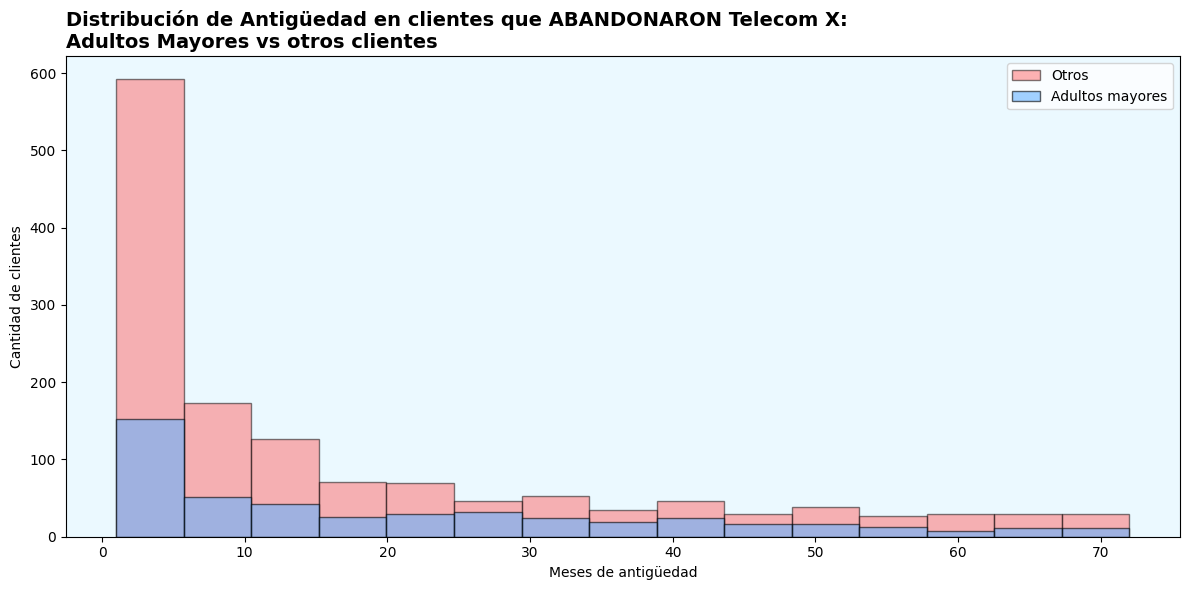

In [122]:
mostrar_graficos_adultos_mayores()

**¿Qué se visualizó?**

Se presentan cinco gráficos que analizan la evasión en función de la variable **"Adulto Mayor"**:

>* **El gráfico de rosca** muestra la proporción de clientes adultos mayores que han abandonado el servicio, comparado con los no adultos mayores.
>
>* **Dos gráficos (boxplot e histograma)** muestran la antigüedad de quienes permanecen, diferenciando entre adultos mayores y otros clientes.
>
>* **Otros dos gráficos (boxplot e histograma)** comparan la antigüedad de quienes abandonaron el servicio, también segmentando por condición de edad.

**¿Qué se identificó?**

>* Solo el **25.47% de quienes abandonaron eran adultos mayores**, lo que representa una **proporción baja respecto al total** de clientes que evaden.
>
>* Los adultos mayores que **permanecen** presentan una **mayor antigüedad promedio y mediana** en comparación con los demás.
>
>* Entre quienes **abandonan**, los adultos mayores también tienen mayor antigüedad que otros, lo que indica que **su abandono ocurre en etapas más tardías**.
>
>* Se confirma una **mayor fidelidad** entre adultos mayores, tanto en duración como en tasas de permanencia.

**¿Qué se puede hacer?**

>* Reconocer al segmento de adultos mayores como un **grupo con alta retención**, ideal para programas de fidelización a largo plazo.
>
>* Diseñar campañas específicas para **potenciar el valor de permanencia de este grupo**, destacando beneficios adaptados a su perfil.
>
>* En análisis posteriores, considerar que **este segmento podría tener menor sensibilidad a cambios** (precios, tecnología) y podría responder mejor a atención personalizada o asesoría directa.

#### **5. Parejas y dependientes**

1. Evasión de clientes: ¿Tienen Pareja?


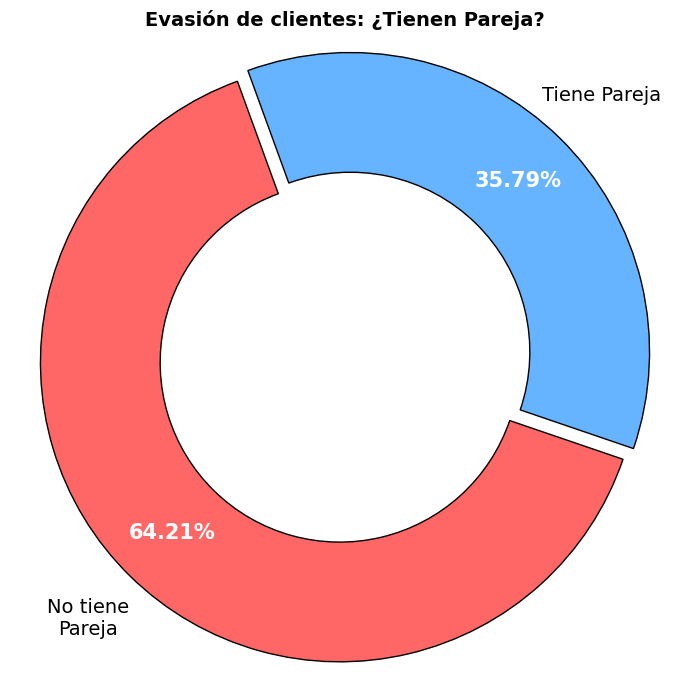



2. Comparativa de clientes con o sin pareja


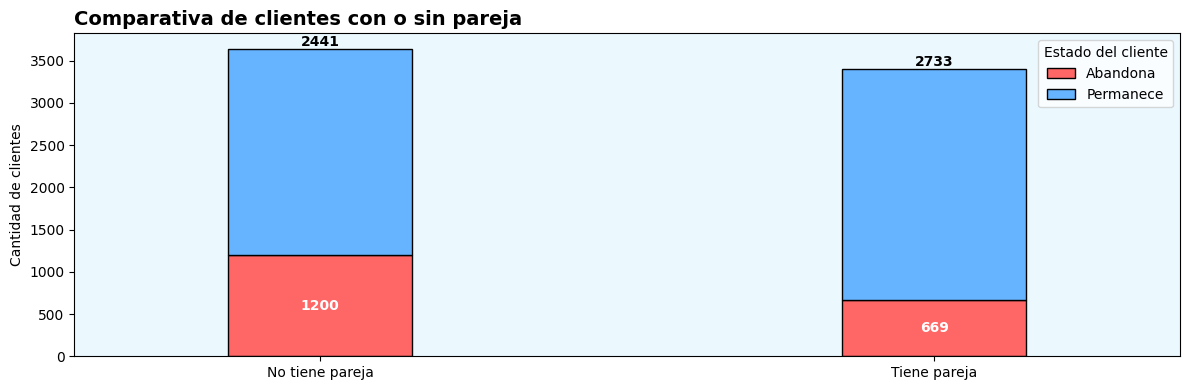



3. Evasión de clientes: Sin dependientes abandonan más


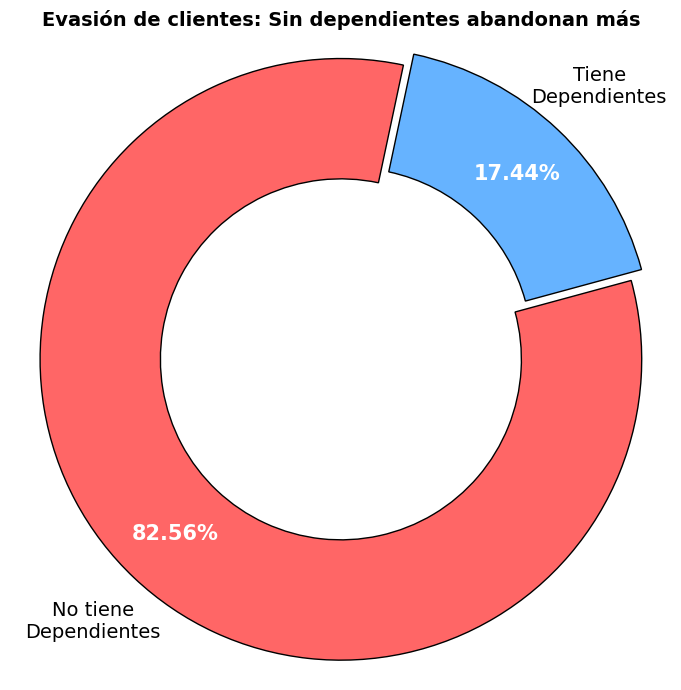

In [124]:
mostrar_graficos_parejas_dependientes()

**¿Qué se visualizó?**

Se presentan tres gráficos centrados en la variable **situación afectiva y familiar** de los clientes:

>* **El primer gráfico** analiza el porcentaje de evasión según si los clientes tienen o no pareja, mostrando una distribución porcentual.
>
>* **El segundo gráfico** compara las cantidades absolutas de clientes que permanecen y que abandonan, diferenciados por su situación de pareja.
>
>* **El tercer gráfico** presenta la proporción de evasión en función de si los clientes tienen o no **personas dependientes** a su cargo.

**¿Qué se identificó?**

>* Los clientes que **no tienen pareja** presentan una tasa de evasión más alta (**64.21%**) en comparación con quienes sí la tienen (**35.79%**).
>
>* Esta diferencia también se refleja en los números absolutos: **1200 de 3641 clientes sin pareja abandonan**, frente a **669 de 3402 con pareja**.
>
>* La evasión también es más alta entre quienes **no tienen dependientes** (**82.56%**) que entre quienes sí tienen (**17.44%**).
>
>* Estos datos sugieren que la **estabilidad afectiva y familiar** puede influir en la decisión de permanecer en la empresa.

**¿Qué se puede hacer?**

>* Analizar si los clientes sin pareja o sin dependientes enfrentan barreras o experiencias distintas (costos, soporte, usabilidad).
>
>* Diseñar campañas de retención enfocadas en quienes viven solos o no tienen personas a su cargo.
>
>* Personalizar comunicaciones y beneficios que generen mayor conexión emocional con estos segmentos vulnerables a la evasión.

#### **6. Tipo de contrato y servicios**

1. Distribución de evasión por rango de antigüedad y tipo de contrato


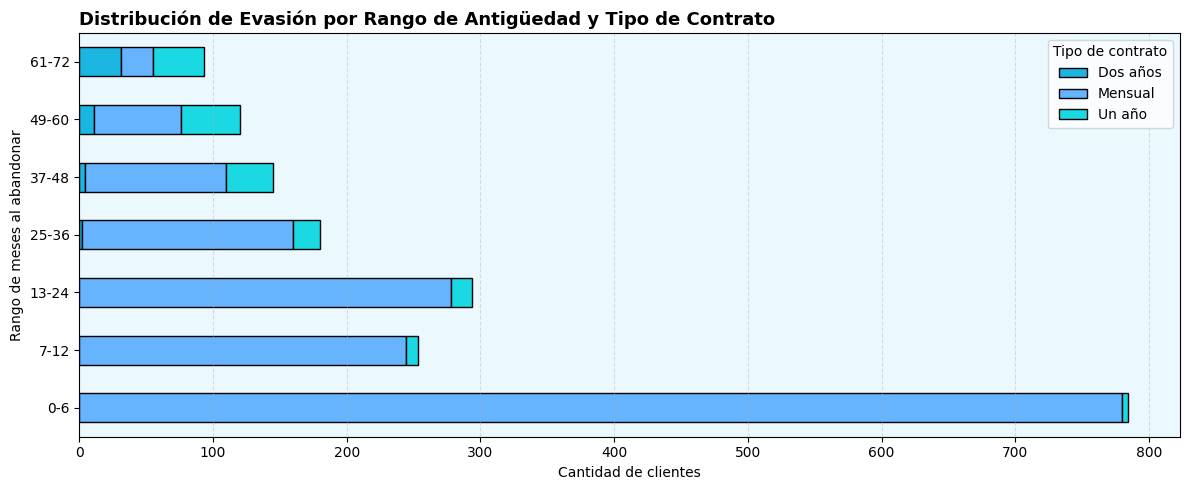



2. Comparativa de clientes según combinación de servicios contratados


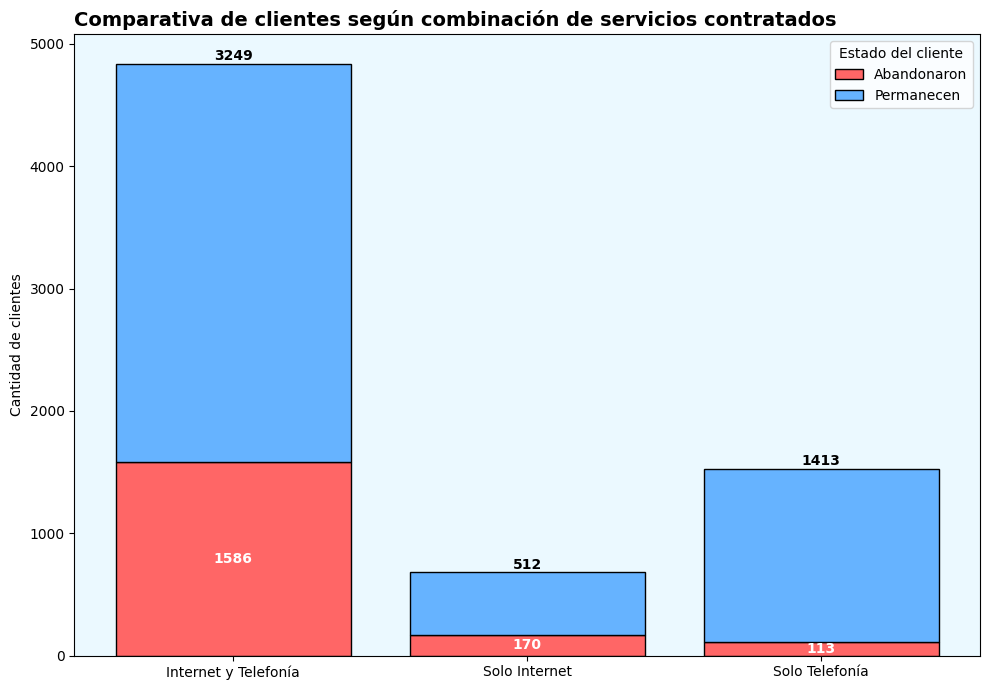



3. Distribución de evasión por rango de antigüedad y tipo de servicio: Clientes con dependientes


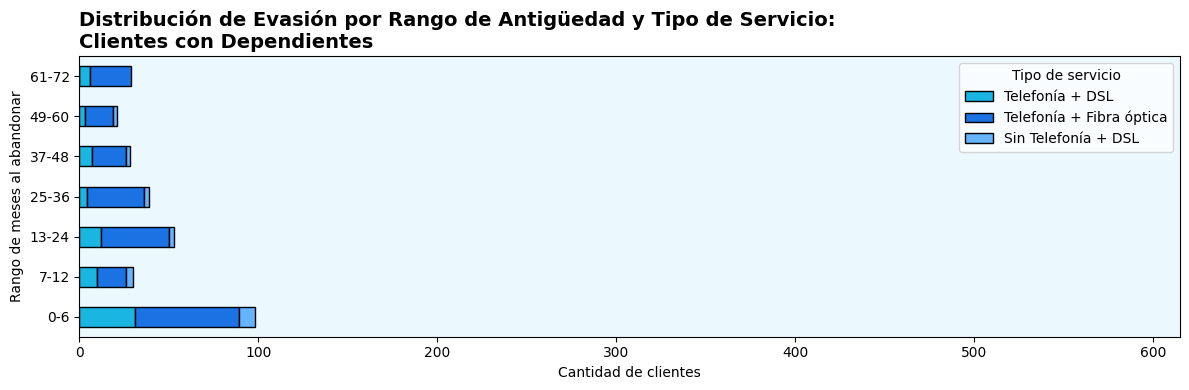



4. Distribución de evasión por rango de antigüedad y tipo de servicio: Clientes sin dependientes


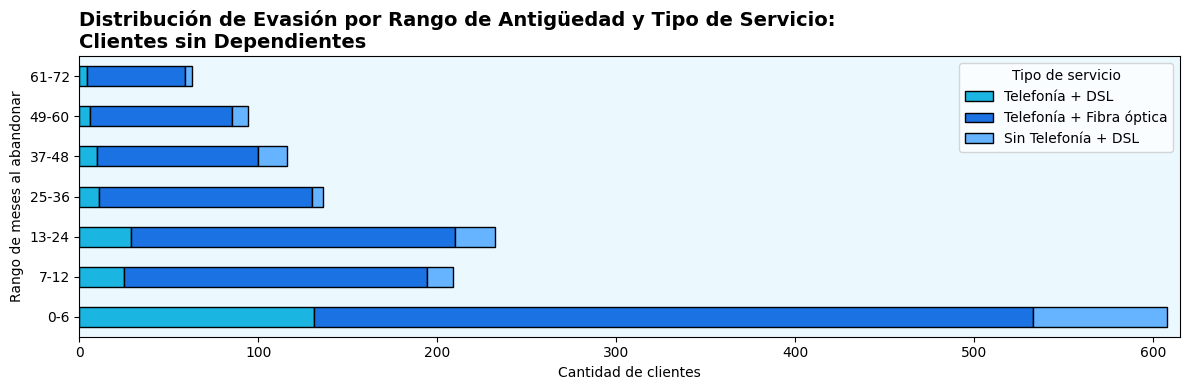



5. Distribución de evasión por rango de antigüedad y tipo de servicio: Comparativa con dependientes (visualización ampliada)


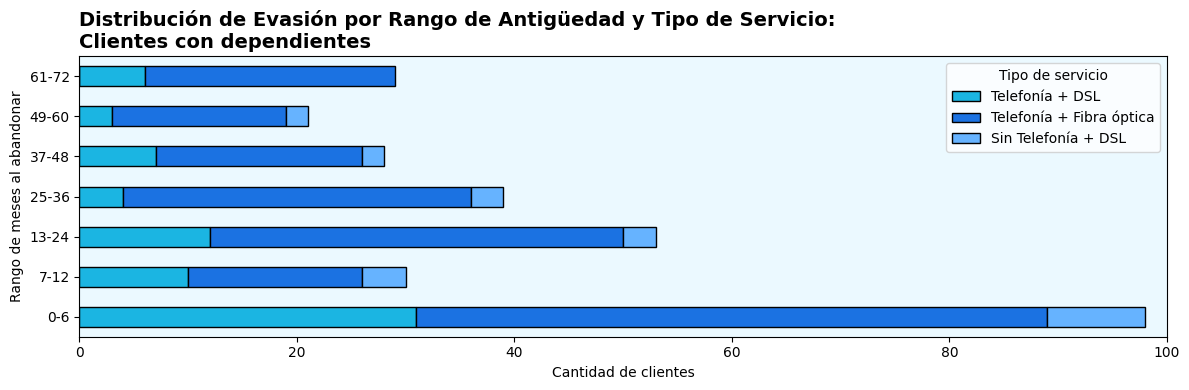



6. Distribución de evasión y permanencia según cantidad de líneas telefónicas


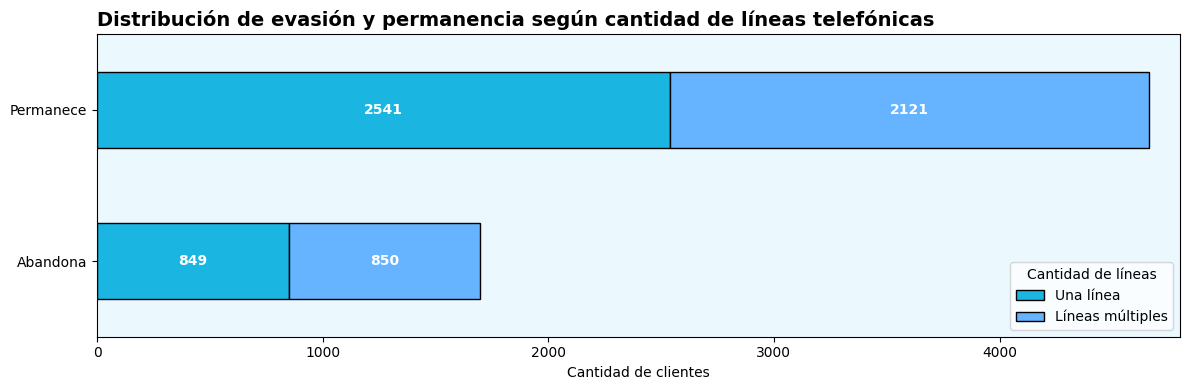



7. Distribución de evasión y permanencia según tipo de servicio de Internet


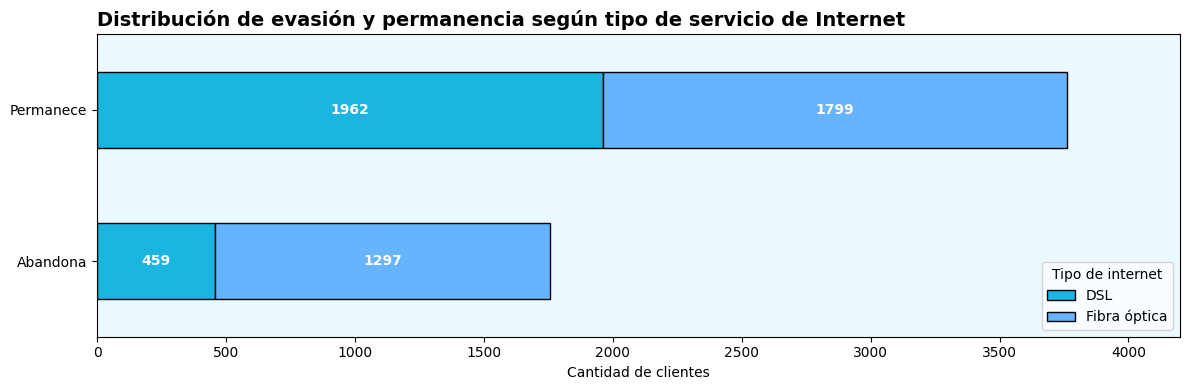



8. Proporción de clientes que abandonaron vs Servicio de internet (gráfico de rosca)


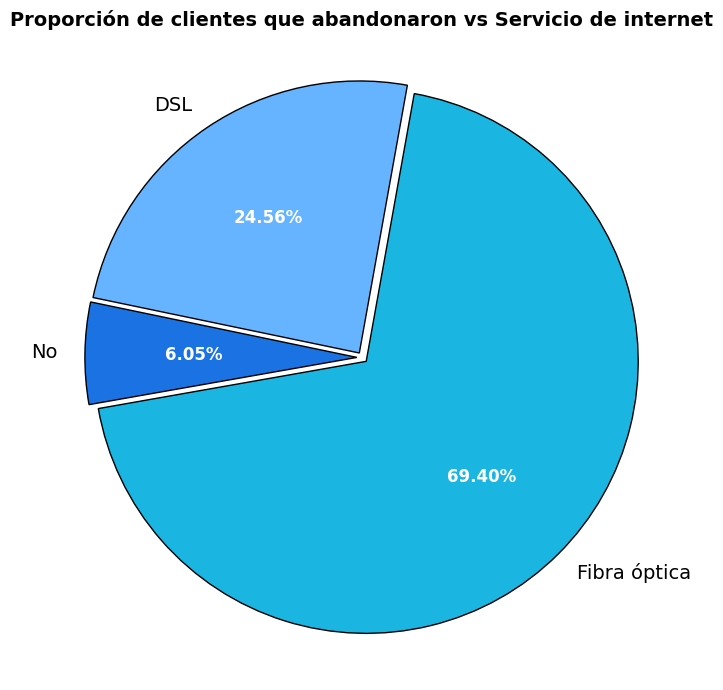



9. Servicios adicionales contratados por clientes que abandonaron: estado por tipo de internet


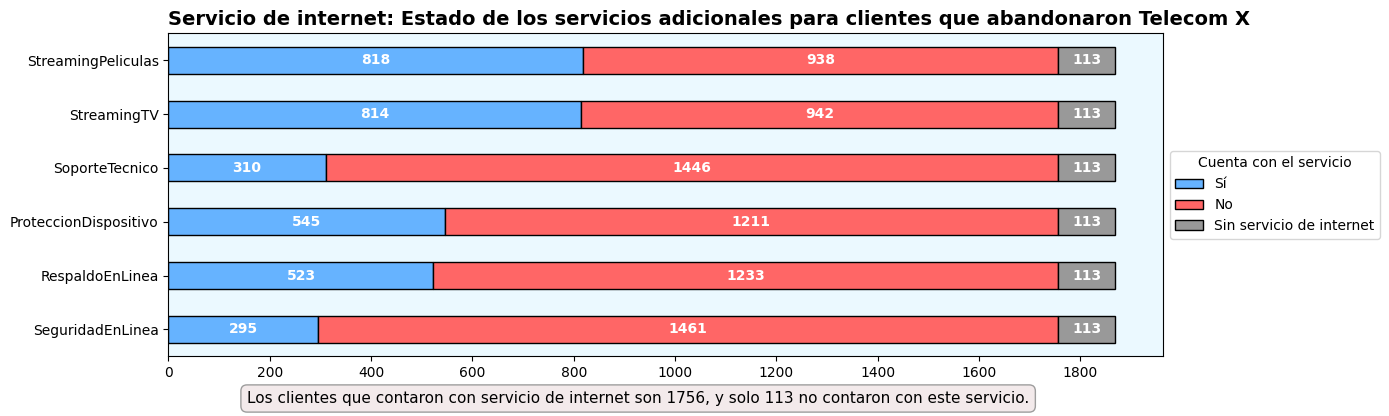



10. Servicios adicionales contratados por clientes que permanecen: estado por tipo de internet


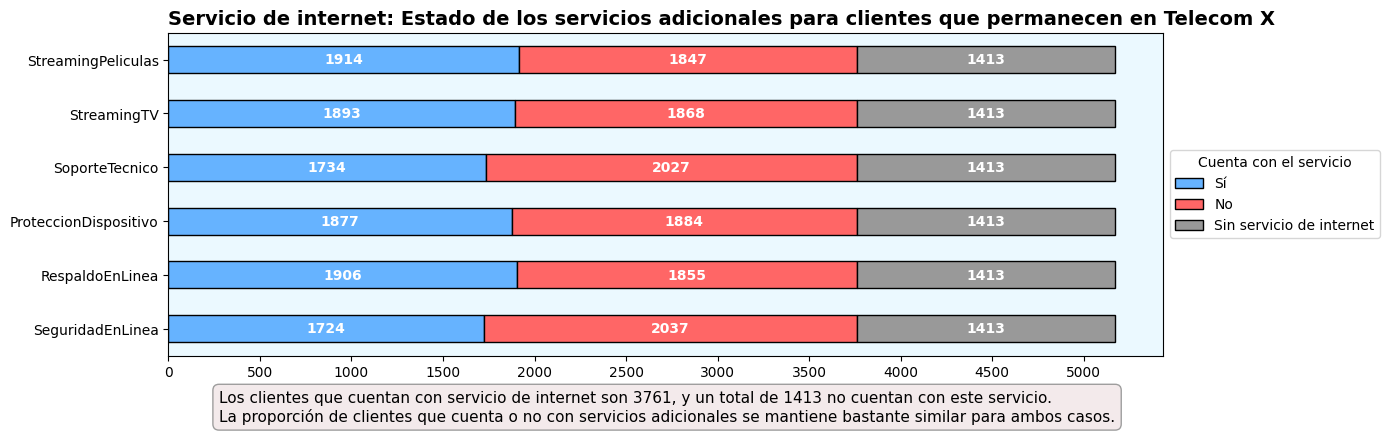

In [126]:
mostrar_graficos_contrato_servicios()

**¿Qué se visualizó?**

Se presentan diez gráficos que exploran el impacto del **tipo de contrato**, **combinación de servicios contratados**, y **tipo de internet** en la evasión de clientes:

>* **El primer gráfico** compara la evasión por tipo de contrato (mensual, anual y de 2 años) a lo largo de rangos de antigüedad.
>
>* **Los gráficos 2 al 5** exploran cómo se distribuyen los servicios entre clientes con y sin dependientes, y cómo la combinación de antigüedad y tipo de servicio influye en la evasión.
>
>* **Los gráficos 6 y 7** evalúan la evasión en función de la cantidad de líneas telefónicas y el tipo de servicio de internet.
>
>* **El gráfico de rosca (8)** muestra la proporción de clientes que abandonan según el tipo de internet (Fibra óptica o DSL).
>
>* **Los últimos dos gráficos (9 y 10)** muestran el uso de servicios adicionales (como Soporte Técnico, Seguridad, Respaldo) diferenciando entre quienes permanecen y quienes abandonaron.

**¿Qué se identificó?**

>* El **contrato mensual** concentra la mayor parte de la evasión, especialmente en clientes con **menos de 12 meses** de antigüedad.
>
>* Los clientes con **servicios combinados (telefonía + internet)** presentan más permanencia, en especial si **tienen dependientes**.
>
>* La **fibra óptica**, a pesar de ser el tipo de internet más común, concentra la mayoría de los abandonos. En cambio, los usuarios de **DSL** tienen una tasa de evasión menor.
>
>* Los clientes con **más de una línea telefónica** tienden a permanecer más tiempo.
>
>* Entre quienes abandonan, la mayoría **no utiliza servicios adicionales**. En contraste, los clientes que permanecen **sí los usan en su mayoría**, destacando especialmente:
> - **Streaming de películas**
> - **Protección de dispositivo**
> - **Soporte técnico**

**¿Qué se puede hacer?**

>* **Reducir la evasión en contratos mensuales** ofreciendo incentivos para migrar a contratos anuales o de 2 años, especialmente antes del mes 6.
>
>* Crear **combos o paquetes integrados** de servicios con descuentos, orientados a clientes sin dependientes para mejorar su fidelización.
>
>* Investigar más a fondo las causas de evasión entre clientes de **fibra óptica**, ya que es el tipo de conexión más afectado.
>
>* **Promover activamente los servicios adicionales** (respaldo, soporte, protección) al momento de la contratación o en campañas de fidelización.
>
>* Usar el patrón de clientes con **más líneas y múltiples servicios** como modelo para mejorar la permanencia en segmentos más volátiles.

#### **7. Métodos de pago y cobros**

1. Proporción de clientes que abandonaron vs Método de Pago


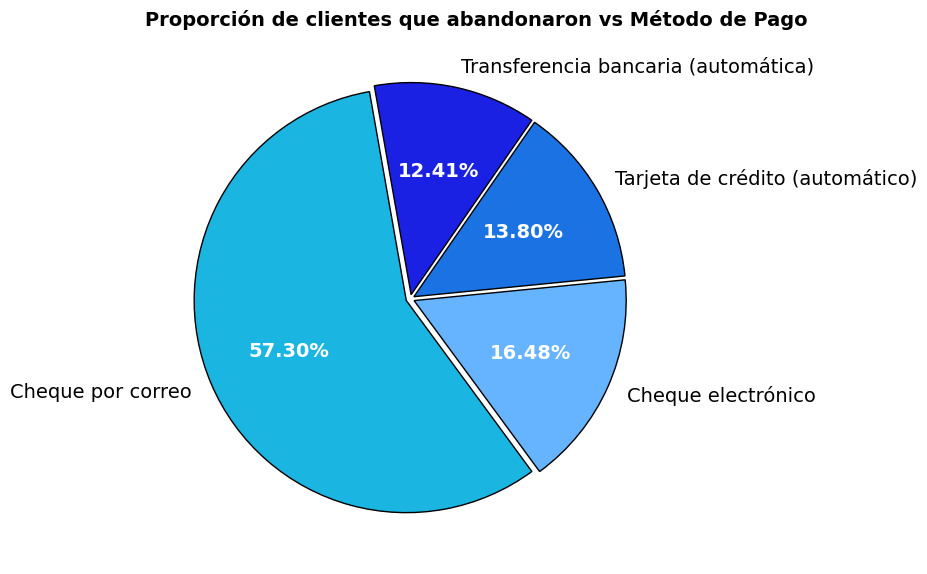



2. Proporción de clientes que permanecen vs Método de Pago


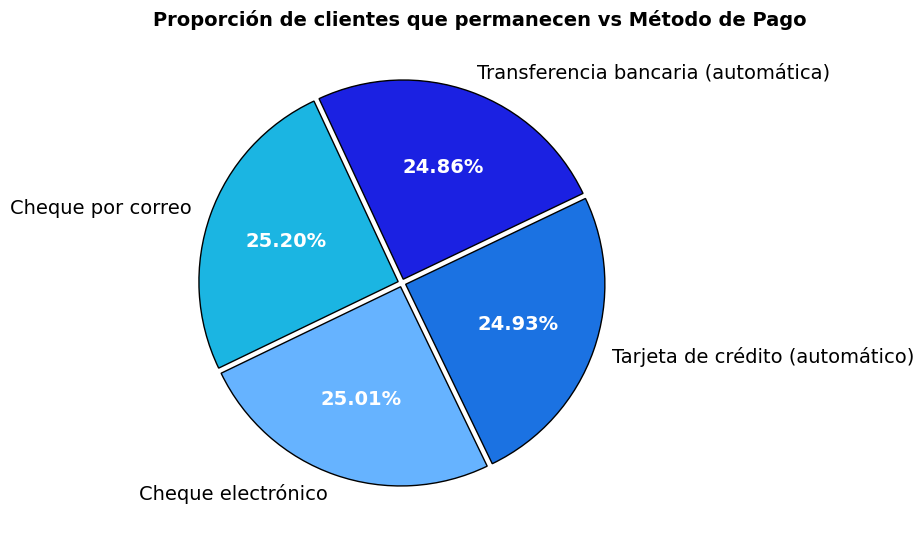



3. Comparativa de clientes por Método de Pago (Evasión vs Permanencia)


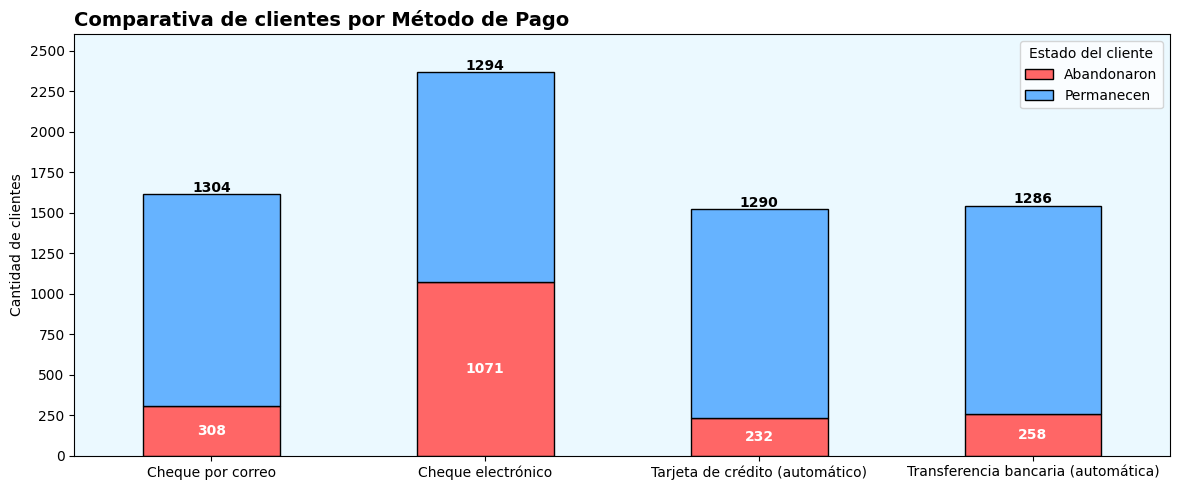



4. Comparación de Cargos (Mensual y Total) entre clientes que abandonaron y permanecen


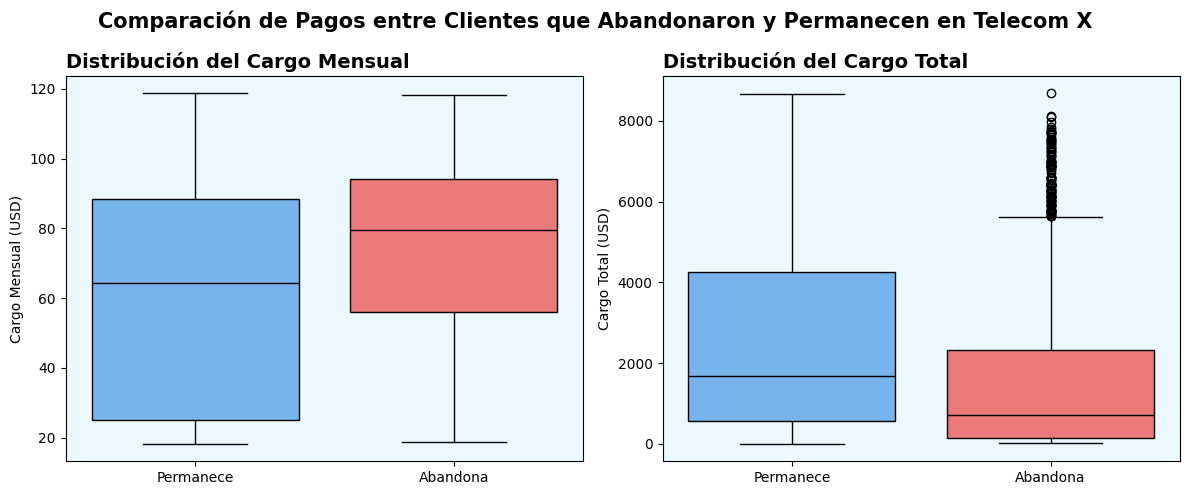



5. Distribución de Cuentas Diarias de clientes que abandonaron


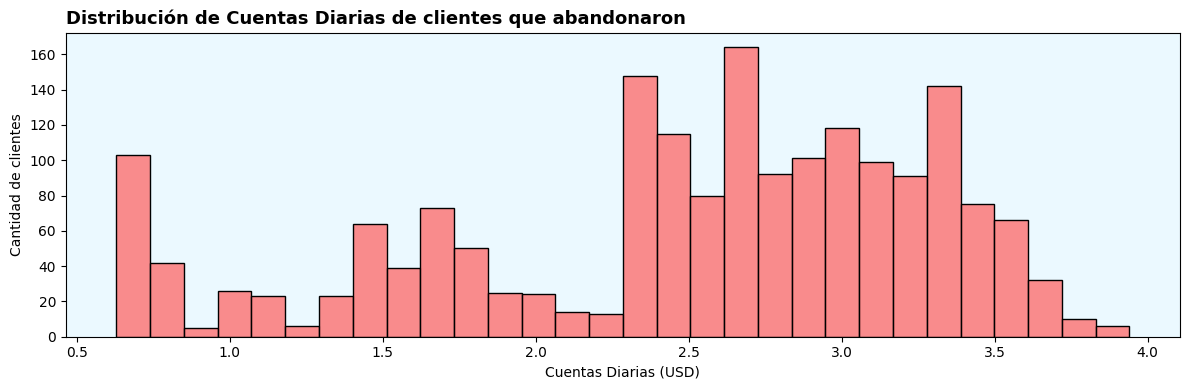



6. Distribución de Cuentas Diarias de clientes que permanecen


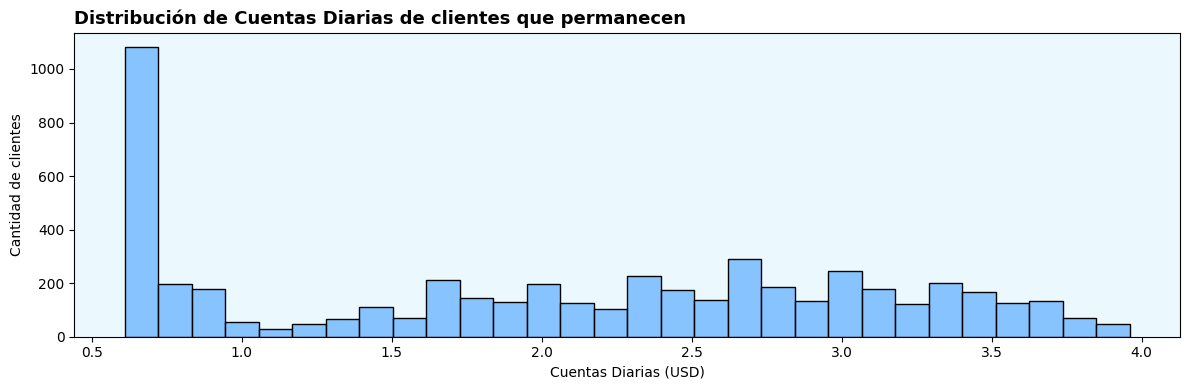

In [128]:
mostrar_graficos_metodos_pago_cobros()

**¿Qué se visualizó?**

Se presentan gráficos enfocados en el **análisis del método de pago y los cobros asociados**.

>* Dos **gráficos de rosca** muestran la proporción de métodos de pago en clientes que **abandonaron** y los que **permanecen**.
>
>* Una **barra apilada comparativa** detalla la cantidad de clientes por método de pago, segmentada por evasión y permanencia.
>
>* Un **boxplot doble** compara la distribución del **cargo mensual** y **cargo total** entre ambos grupos.
>
>* Dos **histogramas** muestran la distribución de **cuentas diarias**, uno para clientes que abandonaron y otro para los que permanecen.

**¿Qué se identificó?**

>* El método de **cheque por correo** representa el **57.3%** de quienes abandonaron, pero solo el **25.2%** de los que permanecen.
>
>* Los métodos **automáticos** (transferencia, tarjeta de crédito, cheque electrónico) presentan proporciones muy similares entre los que permanecen, cercanas al **25%** cada uno.
>
>* En términos absolutos, el método con más abandonos es **cheque electrónico (1.071 clientes)**, seguido por **cheque por correo (308 clientes)**.
>
>* Los clientes que abandonan presentan **cargos mensuales más altos**, mientras que los que permanecen tienen **cargos totales más elevados**, evidenciando mayor antigüedad acumulada.
>
>* En la distribución de cuentas diarias, los clientes que abandonan concentran sus valores en el rango de **2.5 a 3.5 USD**, mientras que los que permanecen muestran un **peak entre 0.5 y 1.0 USD**.

**¿Qué se puede hacer?**

>* Fomentar el uso de **métodos de pago automáticos**, ya que están asociados a una mayor retención.
>
>* Realizar campañas específicas para migrar clientes con **cheque por correo** hacia medios de pago más estables.
>
>* Implementar alertas tempranas para clientes con **cargos mensuales altos**, ya que podrían estar en riesgo de evasión.
>
>* Estudiar los casos con **cuentas diarias elevadas**, ya que podrían representar perfiles de riesgo.
>
>* Ofrecer beneficios diferenciados para clientes con **historial de pago estable y cargos bajos**, incentivando la permanencia.

### **Conclusiones finales**

**Análisis general:**

A través del estudio visual de múltiples variables asociadas al abandono del servicio en Telecom X, se logró construir un panorama claro y detallado del fenómeno de evasión de clientes. La información analizada abarcó desde la proporción global de evasión hasta patrones por edad, género, servicios contratados, tipo de contrato, antigüedad, y comportamiento frente al pago, entre otros aspectos. A continuación, se presenta una síntesis de los hallazgos más relevantes:

**Clientes que abandonan el servicio: ¿Quiénes son?**

>* La evasión afecta a **más del 26.5%** de los clientes, una cifra significativa para cualquier empresa de telecomunicaciones.
>
>* **Clientes nuevos**, especialmente los que se encuentran en sus **primeros 3 a 6 meses** en la compañía, muestran una alta probabilidad de evasión. El peak de abandono se concentra en el **mes 1**, lo que sugiere **problemas en la etapa inicial del servicio**, como la instalación, atención o adaptación al sistema ofrecido.
>
>* Los **clientes sin pareja**, **sin dependientes** y **adultos jóvenes** (no adultos mayores) tienen una mayor propensión a abandonar el servicio.
>
>* Aunque **hombres y mujeres** presentan tasas similares de evasión, las mujeres tienen una leve mayoría entre quienes abandonan, lo que podría ser explorado con estudios de percepción de servicio.
>
>* En cuanto a servicios contratados, se observa que quienes tienen **más servicios (como streaming, soporte técnico o respaldo en línea)** presentan mayor lealtad. Por el contrario, quienes **carecen de Internet o servicios adicionales** tienden a abandonar más fácilmente.

**Condiciones que incentivan la permanencia:**

>* Los clientes con **contratos de largo plazo** (uno o dos años) presentan una **menor tasa de evasión** en comparación a los contratos mensuales, lo que refuerza la importancia de la **vinculación contractual prolongada**.
>
>* El **uso de métodos de pago automáticos** (tarjeta de crédito o transferencia bancaria) se asocia a mayor estabilidad y permanencia. En cambio, métodos manuales como **cheque por correo** están fuertemente relacionados con el abandono.
>
>* Los clientes que permanecen tienden a tener **cargos mensuales más bajos pero cargos totales más altos**, reflejo de una mayor **antigüedad** y menor rotación.
>
>* La distribución de **cuentas diarias** entre quienes permanecen es más baja, sugiriendo que el control de costos puede ser un factor protector frente al abandono.

**Recomendaciones Estratégicas para Reducir la Evasión:**

>* **Fortalecer la experiencia del cliente en los primeros 3 a 6 meses**, mediante acompañamiento activo, mejoras en el servicio técnico inicial y comunicación efectiva.
>
>* **Diseñar campañas para migrar contratos mensuales a contratos anuales**, entregando incentivos o beneficios por fidelidad anticipada.
>
>* **Identificar clientes de alto riesgo** según perfil (jóvenes, sin pareja, sin dependientes, cargos altos) y aplicar estrategias de contención como encuestas, ofertas personalizadas o llamadas proactivas.
>
>* **Promover activamente los métodos de pago automáticos**, acompañados de promociones o descuentos por su uso.
>
>* Implementar un sistema de **monitoreo mensual del indicador global de evasión (26.5%)**, contrastándolo con resultados segmentados para una gestión ágil y basada en datos.

**Visión Final:**

El análisis integral demuestra que la evasión no es un fenómeno aleatorio, sino que responde a **patrones claros y predecibles**. Telecom X tiene una gran oportunidad de **mejorar su retención** mediante acciones **proactivas, personalizadas y focalizadas** en los segmentos más vulnerables. Esta información también puede ser utilizada para **entrenar modelos predictivos de evasión**, generar **sistemas de alerta temprana** y rediseñar la **propuesta de valor** de acuerdo con los grupos más leales y rentables. La clave está en **escuchar los datos** y convertirlos en acciones concretas para el negocio.